# Data exploration and pre-processing

### Dataset Investigation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("ddos_dataset.csv",index_col=[0])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Exploring various aspects, including flow, IP, and ports, within a dataset is essential for gaining insights into the dataset's structure and temporal evolution. In the context of machine learning, understanding the intricacies of the data is paramount for effective analysis and modeling. For instance, in the domain of network data, a detailed examination of information flow can yield valuable insights into communication patterns among different components.

Being cognizant of the behaviors exhibited by IP addresses and ports is particularly crucial in machine learning tasks related to network security, anomaly detection, or any scenario where comprehending how devices interact holds significant importance. This understanding serves as a foundation for developing models that can learn from and adapt to the nuanced features present in the data, contributing to the success of machine learning applications.

The initial step in the project involves showcasing the dataset using diverse data visualization methods and conducting analyses.

In this section, we will analyze the dataset based on the associated flows and IP addresses.


The first chart in the report is dedicated to showcasing the top five source and destination IP addresses most frequently used in the dataset. This graphical representation provides an immediate overview of the primary players in network communication, highlighting the IP addresses that are most active as both senders and receivers.

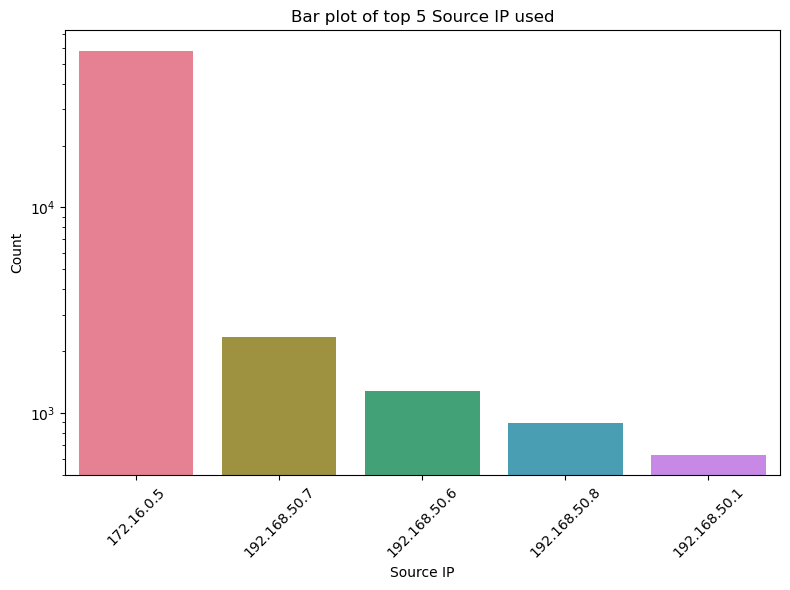

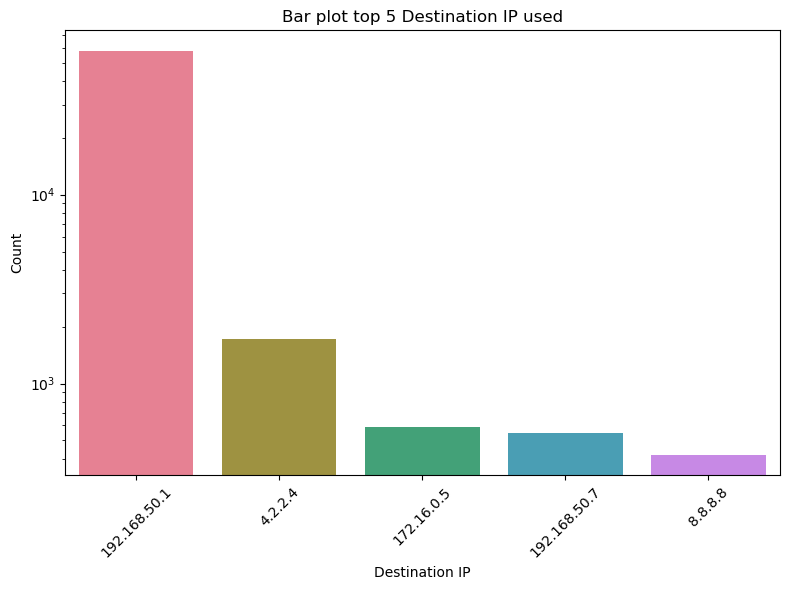

In [3]:
#Top5 src IP used
s_counts = df[' Source IP'].value_counts().sort_values(ascending = False).head().reset_index()
s_counts.columns = ['Source IP', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Source IP', y='Count', data=s_counts, palette='husl')
plt.title('Bar plot of top 5 Source IP used')
plt.xticks(rotation=45)
plt.yscale("log")

plt.tight_layout()
plt.show()

#Top 5 Destination IP used
s_counts_d = df[' Destination IP'].value_counts().sort_values(ascending = False).head().reset_index()
s_counts_d.columns = ['Destination IP', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Destination IP', y='Count', data=s_counts_d, palette='husl')
plt.title('Bar plot top 5 Destination IP used')
plt.xticks(rotation=45)
plt.yscale("log")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In this upcoming visualization, we'll continue our exploration of the dataset by examining the top 5 source IP addresses. Each IP will be presented through a box plot, offering insights into the flow packets per second (packets/s) within the flows it is engaged in.

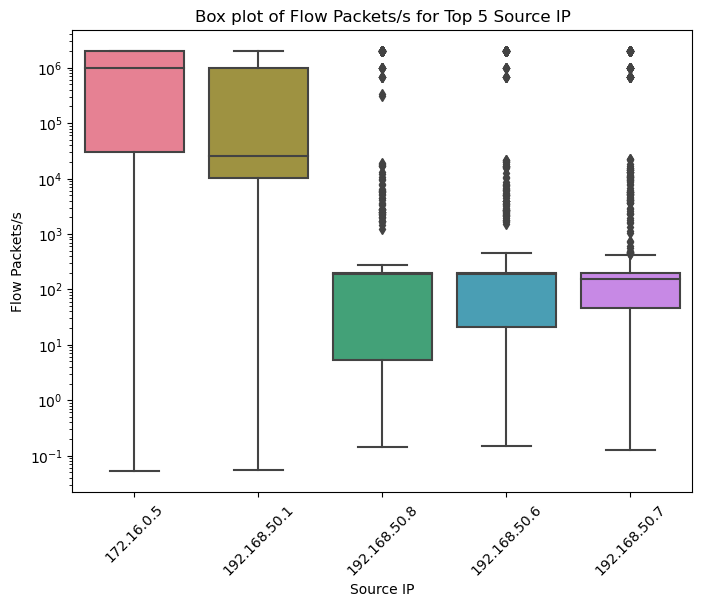

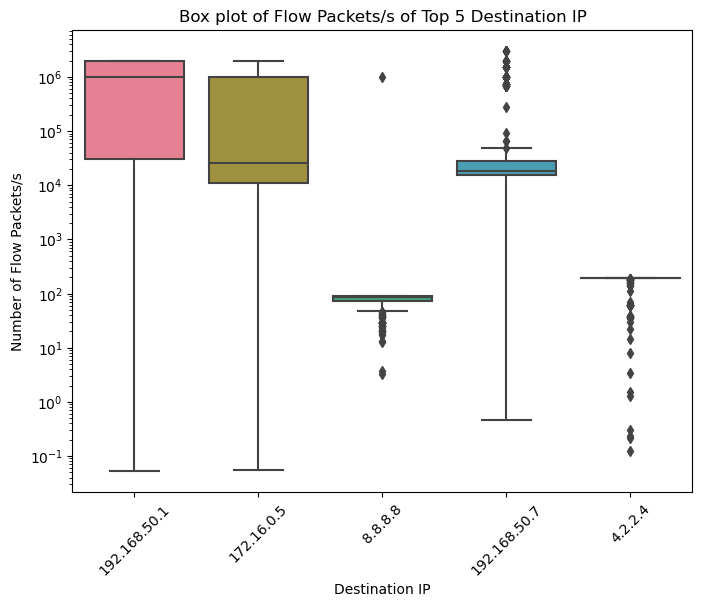

In [4]:
#Boxplot of Flow Packets/s for top5 src IP used
top5_src = s_counts['Source IP']
filtered_df = df[df[' Source IP'].isin(top5_src)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=" Source IP", y=" Flow Packets/s", data=filtered_df, color="lightblue", palette='husl')
plt.yscale("log")

plt.title("Box plot of Flow Packets/s for Top 5 Source IP")
plt.xlabel("Source IP")
plt.ylabel("Flow Packets/s")
plt.xticks(rotation=45)

plt.show()

#Boxplot of Flow Packets/s of Top 5 Destination IP
top5_dst = s_counts_d['Destination IP']
filtered_df = df[df[' Destination IP'].isin(top5_dst)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=" Destination IP", y=" Flow Packets/s", data=filtered_df, color="lightblue", palette='husl')
plt.yscale("log")

plt.title("Box plot of Flow Packets/s of Top 5 Destination IP")
plt.xlabel("Destination IP")
plt.ylabel("Number of Flow Packets/s")
plt.xticks(rotation=45)

plt.show()

The same pattern is evident in the chart displaying box plots of the respective flow duration for the top 5 source and destination IP addresses.

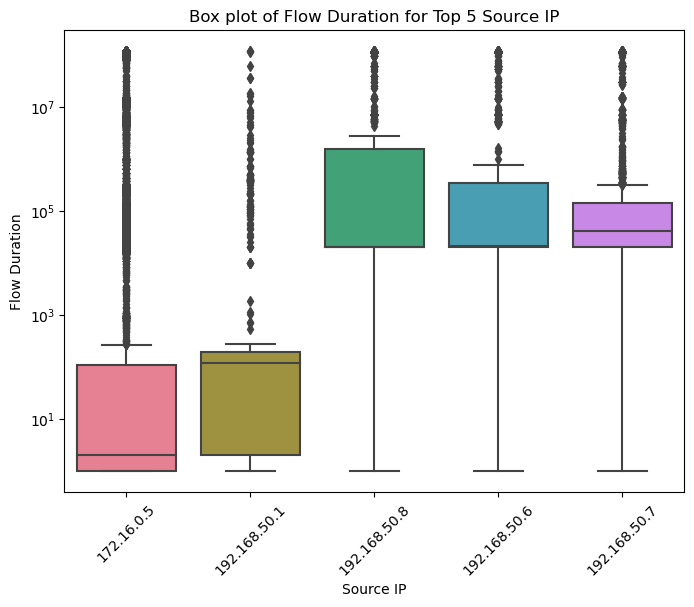

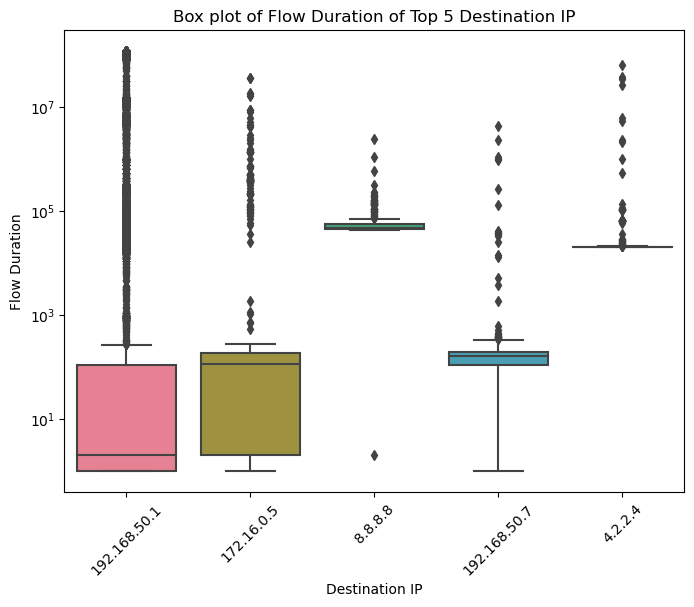

In [5]:
#Boxplot of Flow Duration for top5 src IP
top5_src = s_counts['Source IP']
filtered_df = df[df[' Source IP'].isin(top5_src)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=" Source IP", y=" Flow Duration", data=filtered_df, color="lightblue", palette='husl')
plt.yscale("log")

plt.title("Box plot of Flow Duration for Top 5 Source IP")
plt.xlabel("Source IP")
plt.ylabel("Flow Duration")
plt.xticks(rotation=45)

plt.show()


#Boxplot of Flow Duration of Top 5 Destination IP
top5_dst = s_counts_d['Destination IP']
filtered_df = df[df[' Destination IP'].isin(top5_dst)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=" Destination IP", y=" Flow Duration", data=filtered_df, color="lightblue", palette='husl')
plt.yscale("log")

plt.title("Box plot of Flow Duration of Top 5 Destination IP")
plt.xlabel("Destination IP")
plt.ylabel("Flow Duration")
plt.xticks(rotation=45)

plt.show()

The same exploration for the top 5 source and destination IPs extends to features related to Flow IAT (Inter-Arrival Time) and packet length. In this instance, bar plots are employed to depict the averages of the maximum and minimum values for these features across the flows of each IP. 

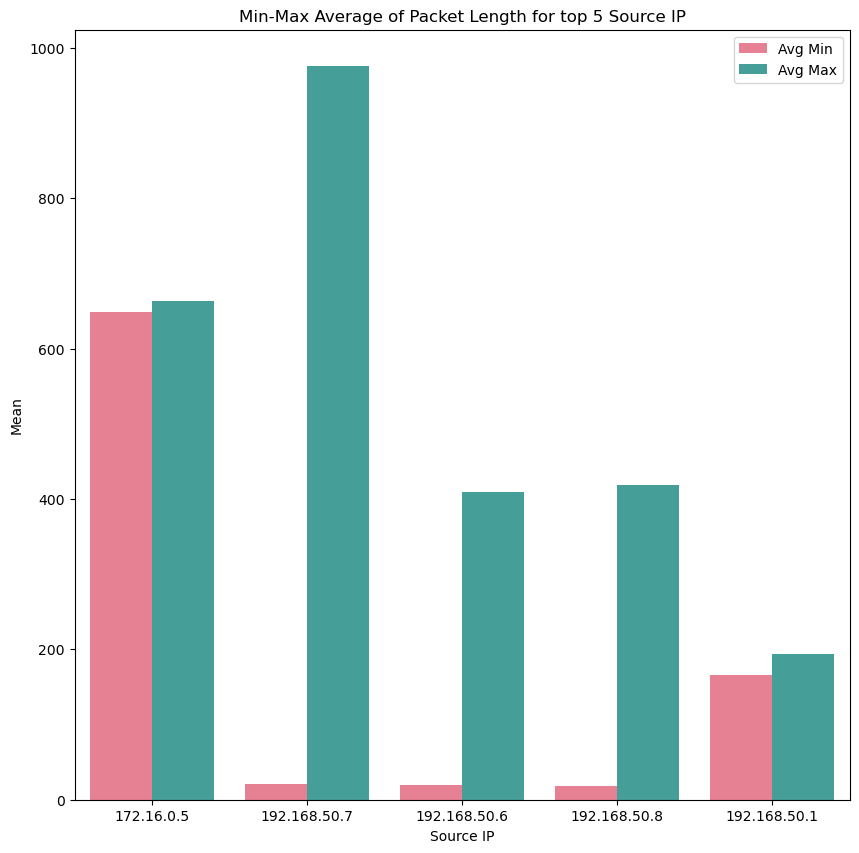

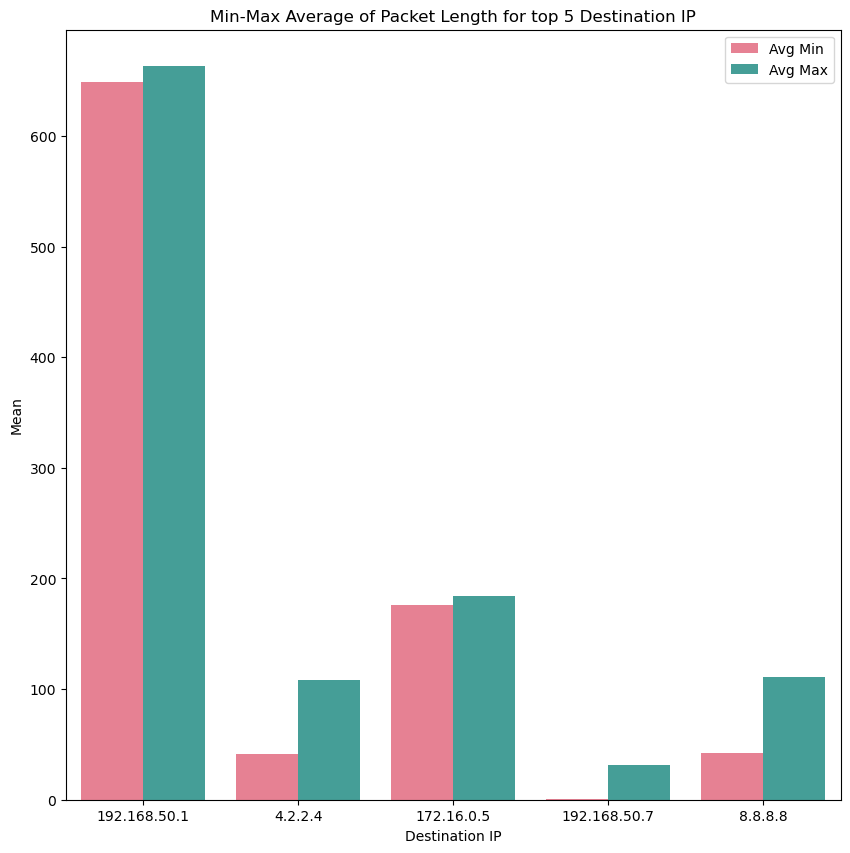

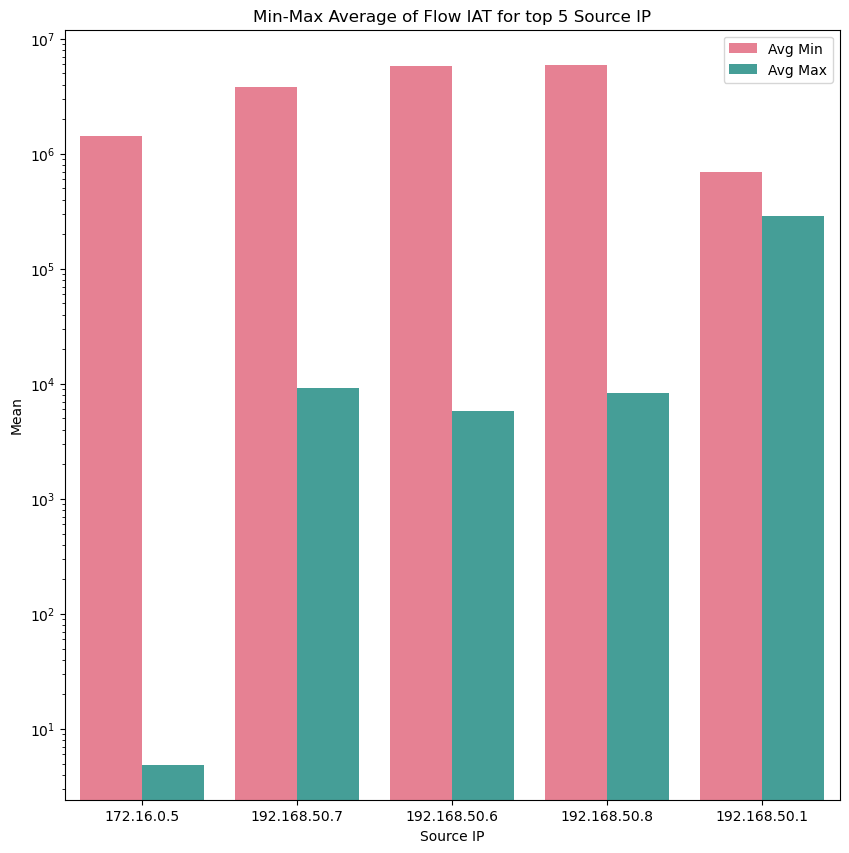

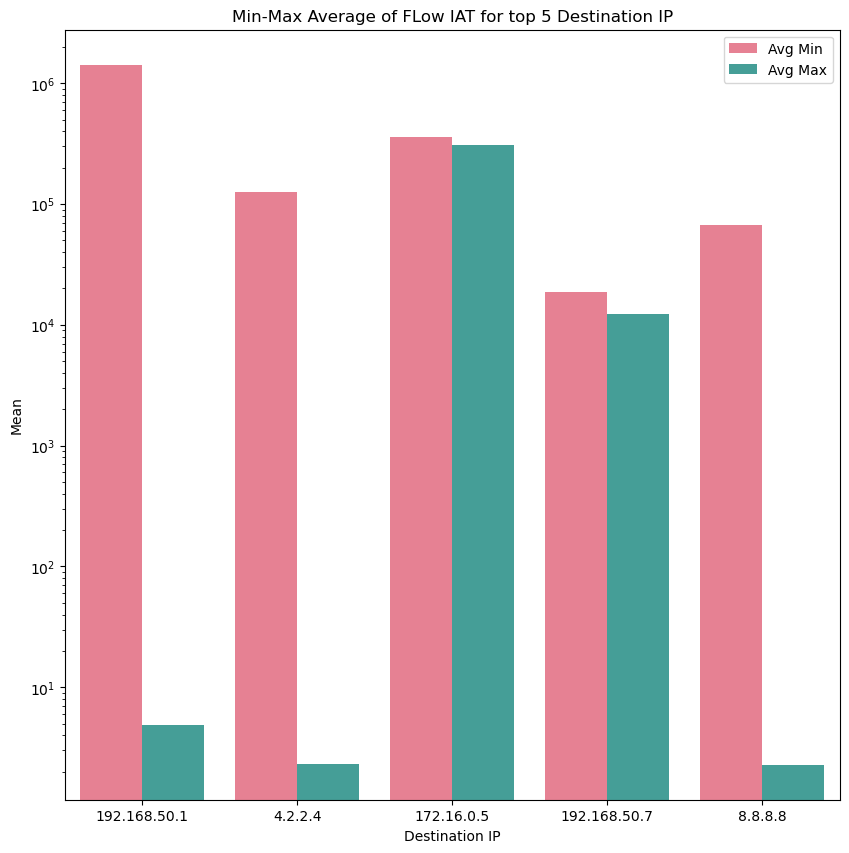

In [6]:
#Min-Max Average of Packet Length for top 5 Source IP
df_sourceip_top5 = df[' Source IP'].value_counts().head(5)
df_maxlen_avgminmax = pd.DataFrame(df_sourceip_top5)

min_means = []
max_means = []

for ip in df_maxlen_avgminmax.index:
  mean_min = df[df[' Source IP'] == ip][' Min Packet Length'].mean()
  mean_max = df[df[' Source IP'] == ip][' Max Packet Length'].mean()
  min_means.append(mean_min)
  max_means.append(mean_max)

df_maxlen_avgminmax['Avg Min'] = min_means
df_maxlen_avgminmax['Avg Max'] = max_means
melt_df = df_maxlen_avgminmax.reset_index().melt(id_vars='index', value_vars=['Avg Min', 'Avg Max'])

plt.figure(figsize=(10, 10))
sns.barplot(data=melt_df, x='index', y='value', hue='variable', palette='husl')

plt.xlabel('Source IP')
plt.ylabel('Mean')
plt.title('Min-Max Average of Packet Length for top 5 Source IP')
plt.legend()
plt.show()

#Min-Max Average of Packet Length for top 5 Destination IP
df_sourceip_top5 = df[' Destination IP'].value_counts().head(5)
df_maxlen_avgminmax = pd.DataFrame(df_sourceip_top5)

min_means = []
max_means = []

for ip in df_maxlen_avgminmax.index:
  mean_min = df[df[' Destination IP'] == ip][' Min Packet Length'].mean()
  mean_max = df[df[' Destination IP'] == ip][' Max Packet Length'].mean()
  min_means.append(mean_min)
  max_means.append(mean_max)

df_maxlen_avgminmax['Avg Min'] = min_means
df_maxlen_avgminmax['Avg Max'] = max_means
melt_df = df_maxlen_avgminmax.reset_index().melt(id_vars='index', value_vars=['Avg Min', 'Avg Max'])

plt.figure(figsize=(10, 10))
sns.barplot(data=melt_df, x='index', y='value', hue='variable', palette='husl')
plt.xlabel('Destination IP')
plt.ylabel('Mean')
plt.title('Min-Max Average of Packet Length for top 5 Destination IP')
plt.legend()
plt.show()

#Min-Max Average of Flow IAT for top 5 Source IP
df_sourceip_top5 = df[' Source IP'].value_counts().head(5)
df_maxlen_avgminmax = pd.DataFrame(df_sourceip_top5)

min_means = []
max_means = []

for ip in df_maxlen_avgminmax.index:
  mean_min = df[df[' Source IP'] == ip][' Flow IAT Max'].mean()
  mean_max = df[df[' Source IP'] == ip][' Flow IAT Min'].mean()
  min_means.append(mean_min)
  max_means.append(mean_max)

df_maxlen_avgminmax['Avg Min'] = min_means
df_maxlen_avgminmax['Avg Max'] = max_means
melt_df = df_maxlen_avgminmax.reset_index().melt(id_vars='index', value_vars=['Avg Min', 'Avg Max'])

plt.figure(figsize=(10, 10))
sns.barplot(data=melt_df, x='index', y='value', hue='variable', palette='husl')

plt.yscale('log')
plt.title('Min-Max Average of Flow IAT for top 5 Source IP')
plt.xlabel('Source IP')
plt.ylabel('Mean')
plt.legend()
plt.show()

#Min-Max Average of Flow IAT for top 5 Destination IP
df_sourceip_top5 = df[' Destination IP'].value_counts().head(5)
df_maxlen_avgminmax = pd.DataFrame(df_sourceip_top5)

min_means = []
max_means = []

for ip in df_maxlen_avgminmax.index:
  mean_min = df[df[' Destination IP'] == ip][' Flow IAT Max'].mean()
  mean_max = df[df[' Destination IP'] == ip][' Flow IAT Min'].mean()
  min_means.append(mean_min)
  max_means.append(mean_max)

df_maxlen_avgminmax['Avg Min'] = min_means
df_maxlen_avgminmax['Avg Max'] = max_means
melt_df = df_maxlen_avgminmax.reset_index().melt(id_vars='index', value_vars=['Avg Min', 'Avg Max'])

plt.figure(figsize=(10, 10))
sns.barplot(data=melt_df, x='index', y='value', hue='variable', palette='husl')

plt.yscale('log')
plt.title('Min-Max Average of FLow IAT for top 5 Destination IP')
plt.xlabel('Destination IP')
plt.ylabel('Mean')
plt.legend()
plt.show()


### Ground truth level visualization

Similar to our approach for identifying the top 5 source and destination IP addresses, we will extend our analysis to include the top 10 ports commonly utilized for both source and destination. This step is crucial for a comprehensive understanding of the dataset, as depicted in the subsequent figure. Examining the frequency of these ports provides valuable insights into the communication patterns and potentially highlights any noteworthy trends or anomalies in the data. Addictionally, the boxplots about flow duration and total FWD packets it is provided.

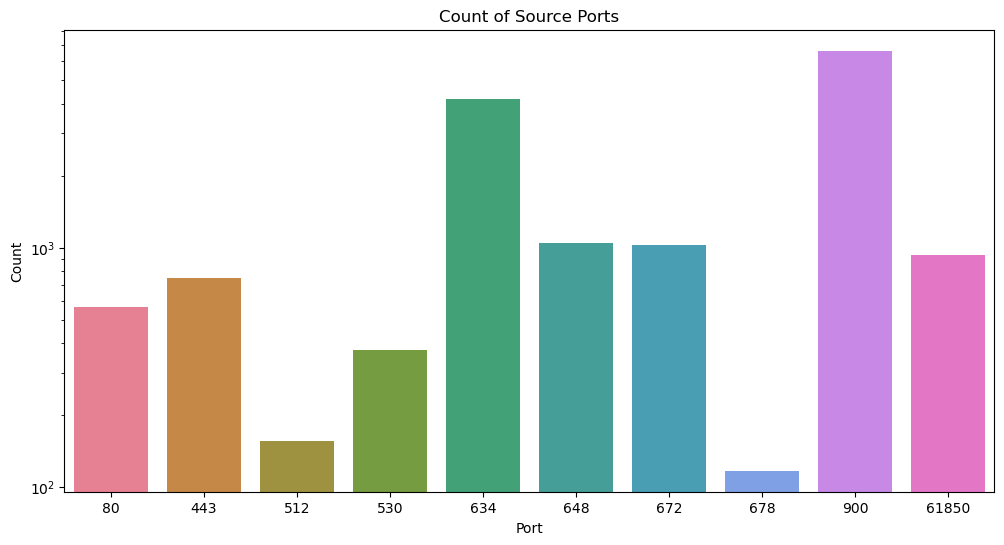

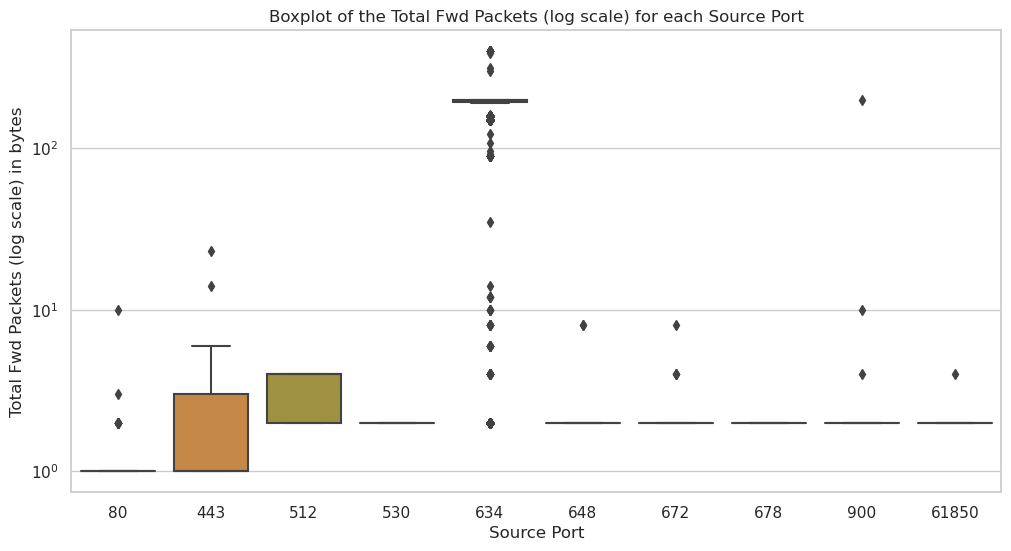

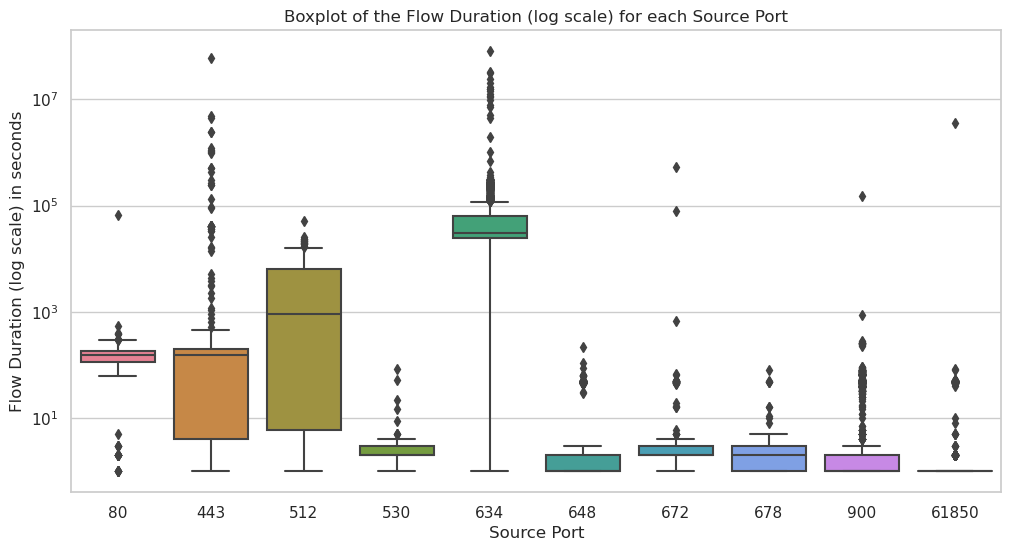

In [7]:
top_10_ports_src = df[' Source Port'].value_counts().head(10)
top_10_ports_src

df1 = df[df[' Source Port'].isin(top_10_ports_src.index)]
df1_subset = df1[[' Source Port', ' Total Fwd Packets']]
df1_subset

#Count of Source Ports
porte_counts = df[' Source Port'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=porte_counts.index, y=porte_counts.values, palette='husl')
plt.yscale('log')
plt.title('Count of Source Ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

sns.set(style="whitegrid")
#Boxplot of the Total Fwd Packets (log scale) for each Source Port

plt.figure(figsize=(12, 6))
sns.boxplot(x=' Source Port', y=' Total Fwd Packets', data=df1, palette='husl')
plt.yscale('log') 
plt.title('Boxplot of the Total Fwd Packets (log scale) for each Source Port')
plt.xlabel('Source Port')
plt.ylabel('Total Fwd Packets (log scale) in bytes')

plt.show()

#Boxplot of the Flow Duration (log scale) for each Source Port
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x=' Source Port', y=' Flow Duration', data=df1, palette='husl')
plt.yscale('log')  
plt.title('Boxplot of the Flow Duration (log scale) for each Source Port')
plt.xlabel('Source Port')
plt.ylabel('Flow Duration (log scale) in seconds')

plt.show()


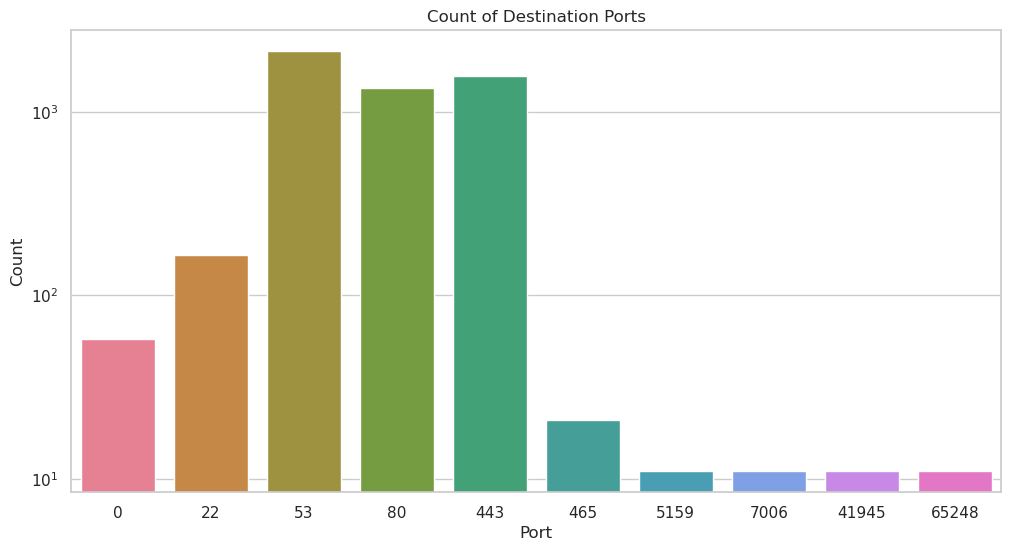

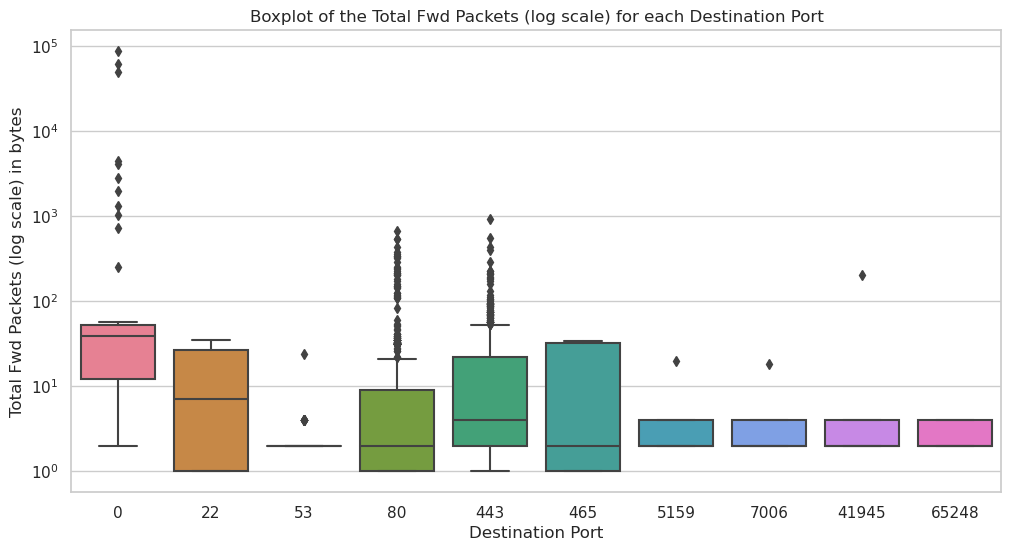

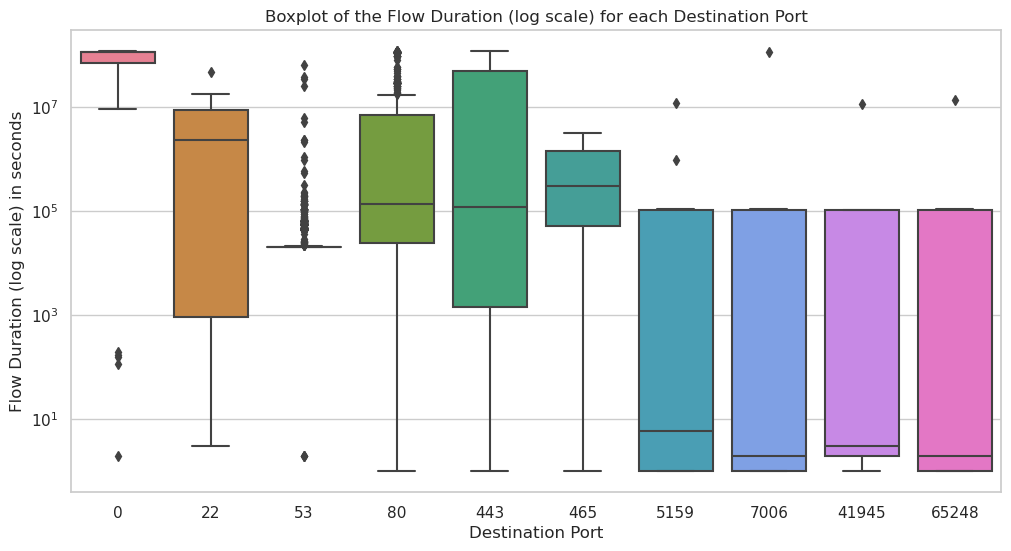

In [8]:
top_10_ports_dst = df[' Destination Port'].value_counts().head(10)
top_10_ports_dst

df1 = df[df[' Destination Port'].isin(top_10_ports_dst.index)]
df1_subset = df1[[' Destination Port', ' Total Fwd Packets']]
df1_subset


# Count of destination ports
porte_counts = df[' Destination Port'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=porte_counts.index, y=porte_counts.values, palette='husl')
plt.yscale('log')
plt.title('Count of Destination Ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()


#Boxplot of the Total Fwd Packets (log scale) for each Destination Port
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x=' Destination Port', y=' Total Fwd Packets', data=df1, palette='husl')
plt.yscale('log')
plt.title('Boxplot of the Total Fwd Packets (log scale) for each Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Total Fwd Packets (log scale) in bytes')
plt.show()

#Boxplot of the Flow Duration (log scale) for each Destination Port
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Destination Port', y=' Flow Duration', data=df1, palette='husl')
plt.yscale('log') 
plt.title('Boxplot of the Flow Duration (log scale) for each Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration (log scale) in seconds')
plt.show()


In this phase of our analysis, we delve into the intricacies of network traffic patterns through diverse visualizations and statistical analyses. Our exploration spans both the generic traffic (GT) level, involving the distribution of features and characterizing GT classes.

To better comprehend the essence of our flows, we start by examining the distribution of labels within our dataset. The use of a pie chart enables a visual representation of label proportions, providing a quick snapshot of the composition of our data. Also, a bar plot is provided.

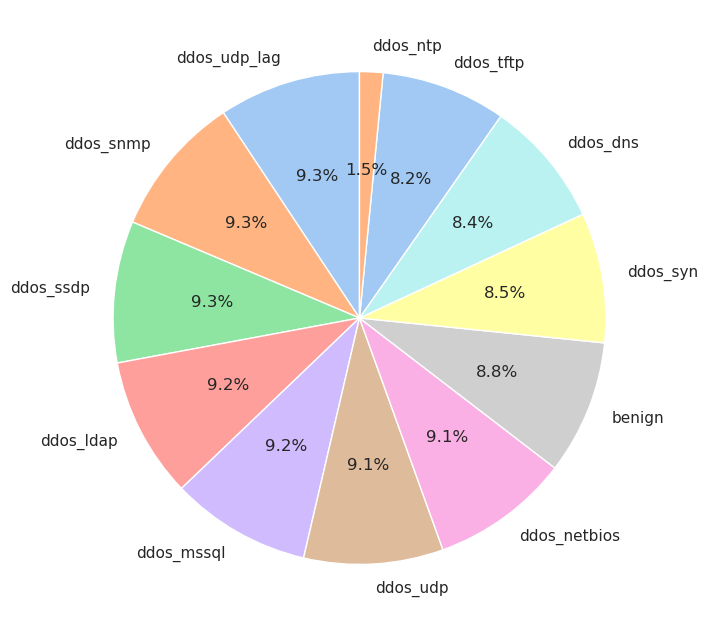

In [9]:
occurrences = df['label'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(occurrences, labels=occurrences.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()

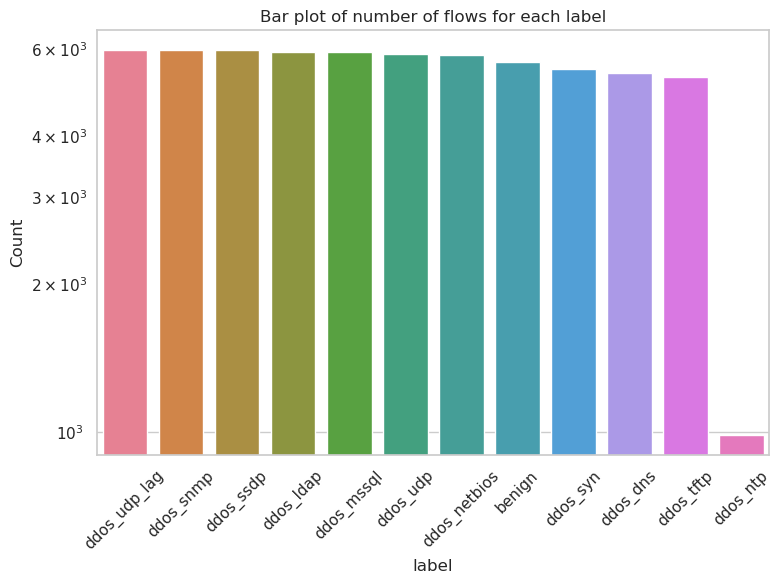

In [10]:
#Number of flows for each label
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='Count', data=label_counts, palette='husl')
plt.title('Bar plot of number of flows for each label')
plt.xticks(rotation=45)
plt.yscale("log")

plt.tight_layout()
plt.show()

As we embark on an exploration of our dataset, our attention turns towards unraveling the
distribution dynamics of UDP, TCP, and HOPOPT protocols.

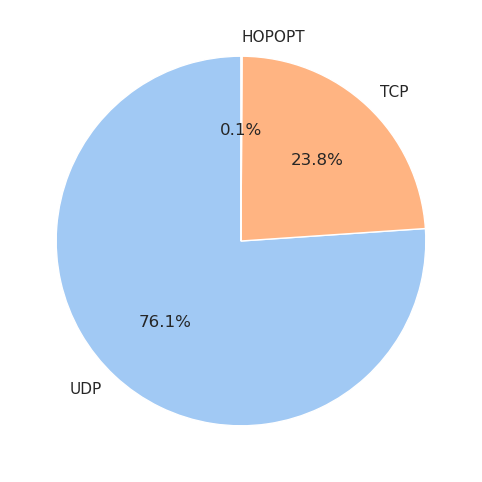

In [11]:
occurrences = df[' Protocol'].value_counts()

colors = sns.color_palette('pastel')


plt.figure(figsize=(8, 6))
etichette = ['UDP', 'TCP', 'HOPOPT']
plt.pie(occurrences, labels=etichette, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()

As we transition towards a more detailed examination, our focus shifts to understanding how these protocols are partitioned across various labels. This phase aims to uncover the intricate relationships between the UDP, TCP, and HOTPOT protocols and the associated labels within our dataset.

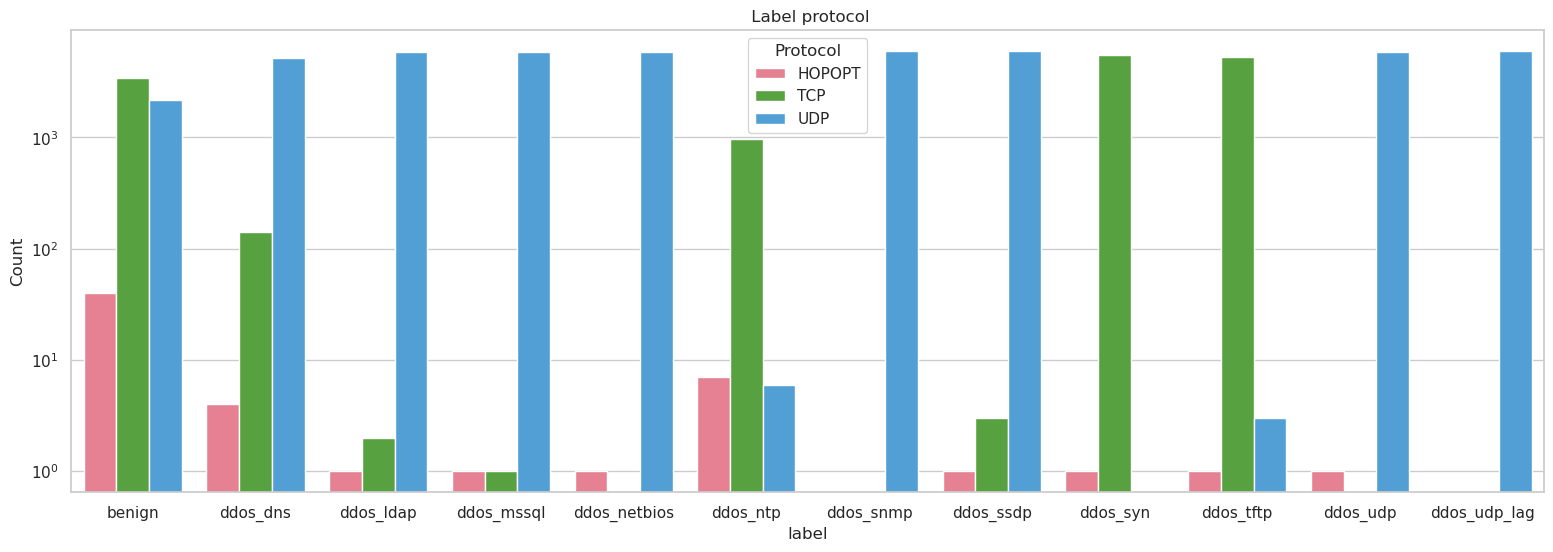

In [12]:
mappa_valori = {0: 'HOPOPT', 6: 'TCP', 17: 'UDP'}
df1 = df.copy()
df1[' Protocol'] = df1[' Protocol'].map(mappa_valori)
cross_tab = pd.crosstab(df1['label'], df1[' Protocol'])

cross_tab_long = cross_tab.reset_index().melt(id_vars='label', var_name='Protocol', value_name='Count')
plt.figure(figsize=(19, 6))
sns.barplot(data=cross_tab_long, x='label', y='Count', hue='Protocol', palette='husl')
plt.title(" Label protocol")
plt.yscale('log')
plt.legend(title='Protocol')
plt.show()

To enhance our understanding of the data, we've included bar plots depicting the mean, minimum, and maximum values for the total forwarded packets, the total flow duration and about the total length of packets for each label in our dataset.

In the accompanying visualizations, the bars represent the mean values, while the error bars provide insights into the variability by indicating the minimum and maximum values.

In [13]:
df_gt = df.groupby("label")
indexes=[]

for key,df_group in df_gt:
    indexes.append(key)

columns=["Min Flow Duration","Mean Flow Duration","Max Flow Duration","Min Total Fwd Packets","Mean Total Fwd Packets","Max Total Fwd Packets","Min Total Length of Fwd Packets","Mean Total Length of Fwd Packets","Max Total Length of Fwd Packets"]
dataset_link= pd.DataFrame(data=np.zeros((len(indexes),len(columns))), columns=columns, index=indexes)

dataset_link["Min Flow Duration"] = df_gt[" Flow Duration"].min()
dataset_link["Max Flow Duration"] = df_gt[" Flow Duration"].max()
dataset_link["Mean Flow Duration"] = df_gt[" Flow Duration"].mean()

dataset_link["Min Total Fwd Packets"] = df_gt[" Total Fwd Packets"].min()
dataset_link["Mean Total Fwd Packets"] = df_gt[" Total Fwd Packets"].mean()
dataset_link["Max Total Fwd Packets"] = df_gt[" Total Fwd Packets"].max()

dataset_link["Min Total Length of Fwd Packets"] = df_gt["Total Length of Fwd Packets"].min()
dataset_link["Mean Total Length of Fwd Packets"] = df_gt["Total Length of Fwd Packets"].mean()
dataset_link["Max Total Length of Fwd Packets"] = df_gt["Total Length of Fwd Packets"].max()


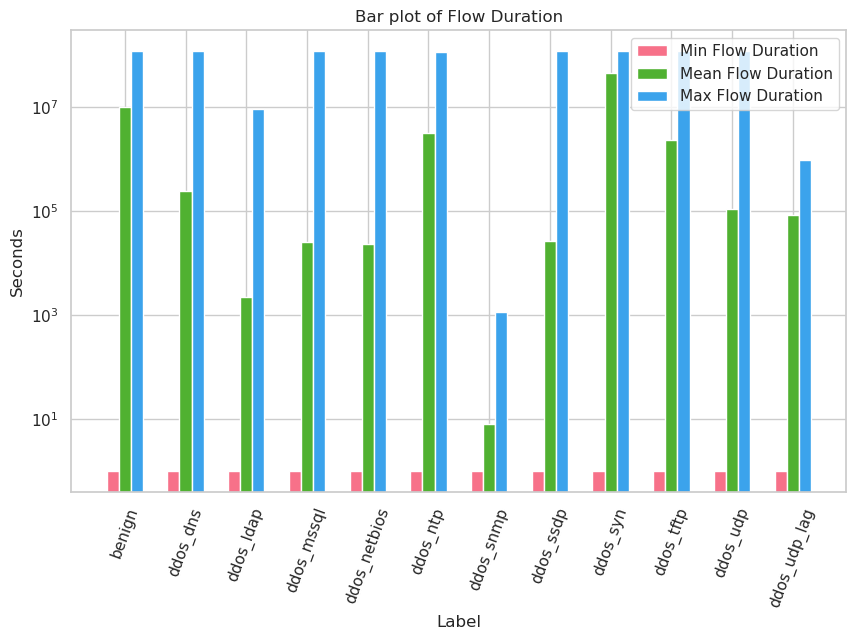

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df_1 = dataset_link.loc[:,:"Max Flow Duration"]

bar_width = 0.2 
index = range(1, 13)
palette = sns.color_palette('husl', n_colors=len(df_1.columns))

for i, (feature, color) in enumerate(zip(df_1.columns, palette)):
    ax.bar([x + i * bar_width for x in index], df_1[feature], width=bar_width, label=feature, color=color)

ax.set_xlabel('Label')
ax.set_ylabel('Seconds')
ax.set_title('Bar plot of Flow Duration')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(df_1.index)
ax.legend()
plt.xticks(rotation=70)

plt.yscale("log")
plt.show()


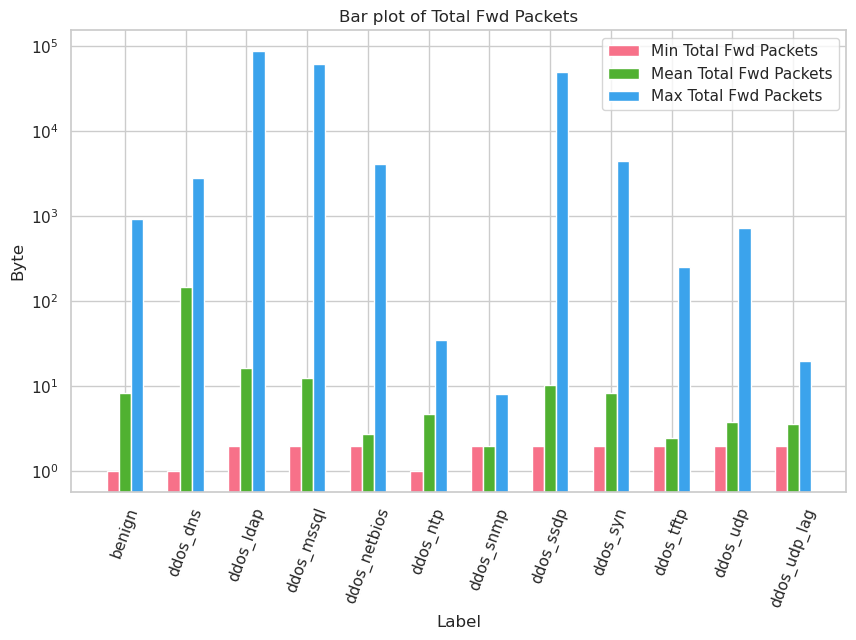

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df_2 = dataset_link.loc[:,"Min Total Fwd Packets":"Max Total Fwd Packets"]

bar_width = 0.2  
index = range(1, 13)
palette = sns.color_palette('husl', n_colors=len(df_2.columns))

for i, (feature, color) in enumerate(zip(df_2.columns, palette)):
    ax.bar([x + i * bar_width for x in index], df_2[feature], width=bar_width, label=feature, color=color)

ax.set_xlabel('Label')
ax.set_ylabel('Byte')
ax.set_title('Bar plot of Total Fwd Packets')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(df_2.index)
ax.legend()

plt.xticks(rotation=70)
plt.yscale("log")
plt.show()

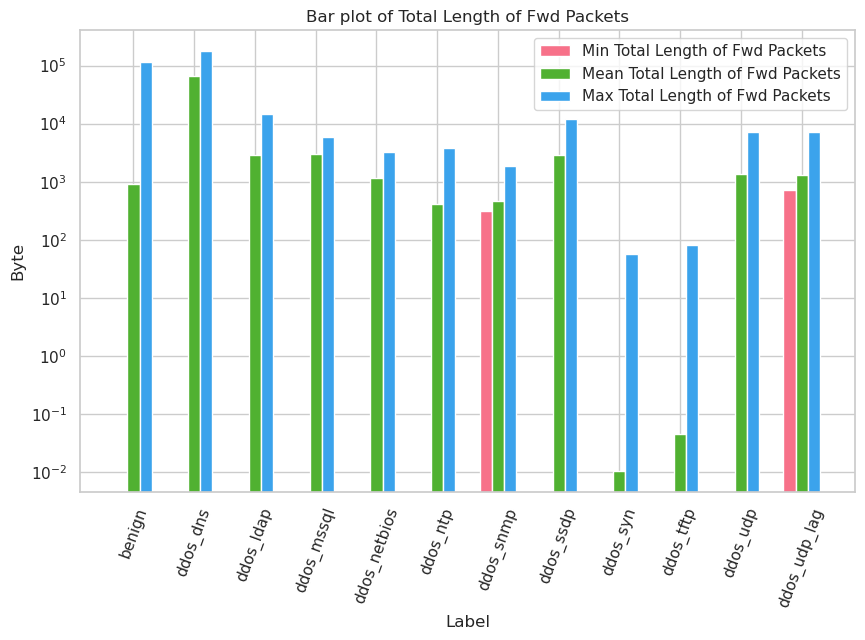

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df_3 = dataset_link.loc[:,"Min Total Length of Fwd Packets":]

bar_width = 0.2  
index = range(1, 13)
palette = sns.color_palette('husl', n_colors=len(df_3.columns))

for i, (feature, color) in enumerate(zip(df_3.columns, palette)):
    ax.bar([x + i * bar_width for x in index], df_3[feature], width=bar_width, label=feature, color=color)
ax.set_xlabel('Label')
ax.set_ylabel('Byte')
ax.set_title('Bar plot of Total Length of Fwd Packets')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(df_3.index)
ax.legend()

plt.xticks(rotation=70)
plt.yscale("log")
plt.show()

The ”Min Packet Length” is another crucial feature to visualize. In this regard, the figure
below illustrates its distribution for each label through a boxplot.

Another way to visualize the distribution of features across different labels is through the Empirical Cumulative Distribution Function (ECDF). The ECDF represents the cumulative probability distribution of a dataset, providing insights into how the data is spread out.

By utilizing the ECDF, we can explore how source and destination ports are distributed for each label in our dataset. This visualization allows us to understand the cumulative distribution of these specific features, offering a comprehensive perspective on their prevalence and spread within each label.

In [17]:
df_attack = df.groupby(['label']).count().index

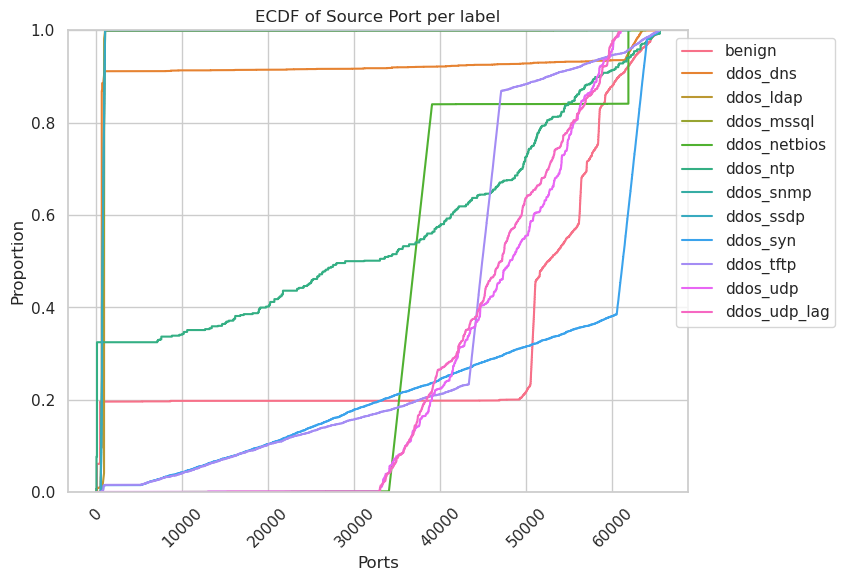

In [18]:
#ECDF of Source Port per label
fig, axs = plt.subplots(figsize=(8, 6))
num_flows = []
palette = sns.color_palette('husl', n_colors=len(df_attack))

for (lab,color) in zip(df_attack,palette):
    df_label = df[df.label == lab]
    sns.ecdfplot(df_label[' Source Port'],color = color)

axs.set_title(f'ECDF of Source Port per label')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right',labels=df_attack)
axs.set_xlabel('Ports')
plt.show()

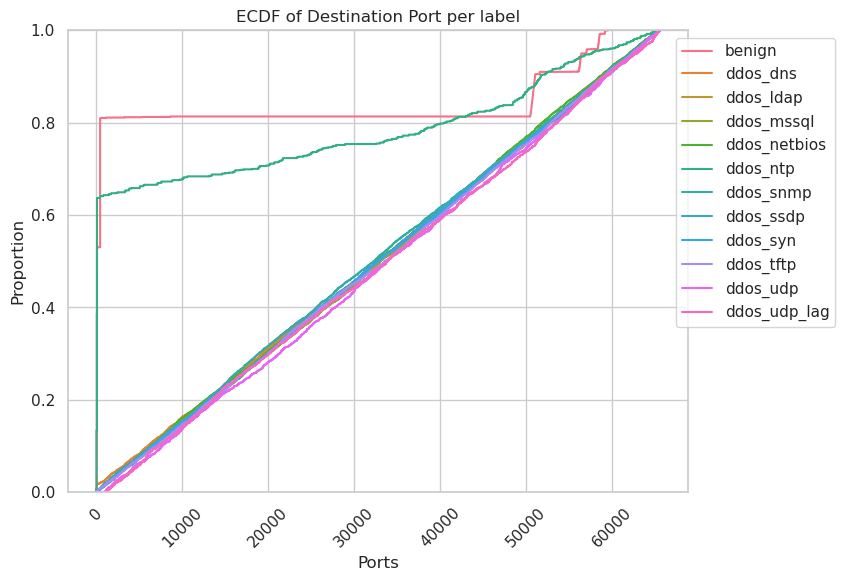

In [19]:
#ECDF of Destination Port per label
fig, axs = plt.subplots(figsize=(8, 6))
num_flows = []
palette = sns.color_palette('husl', n_colors=len(df_attack))

for (lab,color) in zip(df_attack,palette):
    df_label = df[df.label == lab]
    sns.ecdfplot(df_label[' Destination Port'],color = color)

axs.set_title(f'ECDF of Destination Port per label')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right',labels=df_attack)
axs.set_xlabel('Ports')
plt.show()


Furthermore, it is essential to investigate the segmentation of various flows not only based on source and destination IP addresses but also considering the most frequent communications. Specifically, we aim to analyze the quadruplet of source IP, destination IP, source port, and destination port that occurs most frequently. 


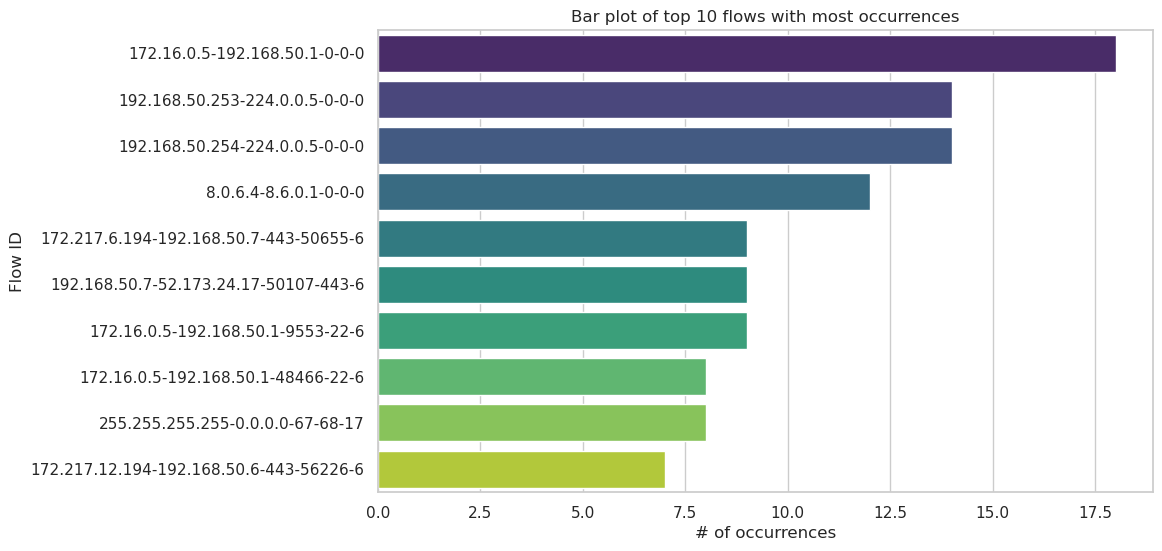

In [20]:

df_groupByLink = df.groupby("Flow ID").count()[" Protocol"].sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=df_groupByLink.index, x=df_groupByLink.values, palette='viridis')
ax.set_ylabel('Flow ID')
ax.set_xlabel('# of occurrences')
ax.set_title('Bar plot of top 10 flows with most occurrences')

plt.show()


In the last analysis, we examine the distribution of number of flows over time. Specifically,
we consider a fraction of a second, namely 0.001s, to observe how many flows we have for each
attack. 

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


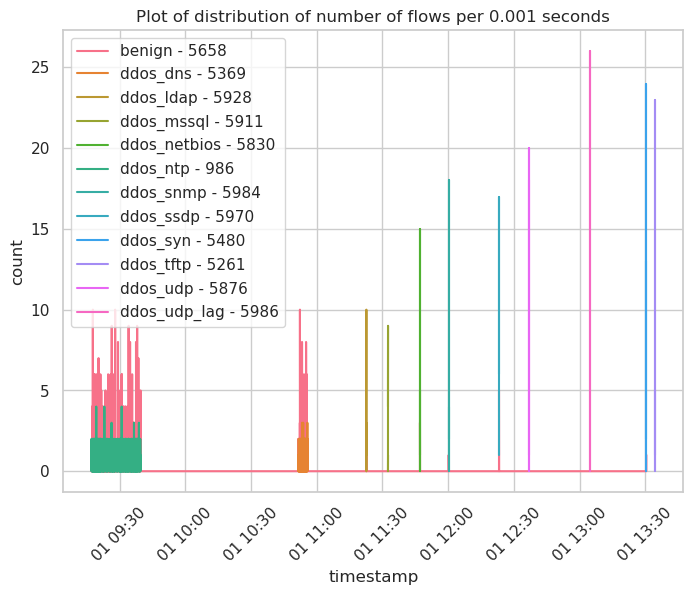

In [21]:
df_time = df.copy()
df_time[' Timestamp'] = pd.to_datetime(df_time[' Timestamp'])
df_time.set_index(' Timestamp',inplace = True)


#Distribution of number of flows per 0.001 seconds
fig, axs = plt.subplots(figsize=(8, 6))
num_flows = []
palette = sns.color_palette('husl', n_colors=len(df_attack))

for (lab,color) in zip(df_attack,palette):
    df_label = df_time[df_time.label == lab]
    num_flows.append(len(df_label))
    axs.plot(df_label.resample('0.001S').count()['label'],label = f'{lab} - {len(df_label)}',color=color)

plt.xticks(rotation=45)
axs.legend()
axs.set_xlabel('timestamp')
axs.set_ylabel('count')
axs.set_title(f'Plot of distribution of number of flows per 0.001 seconds')
plt.show()

# Pre-processing

In [22]:
#dataset: 
df

Flow ID     Source IP   Source Port  \
0        172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5           634   
1        172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1           634   
2        172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5           634   
3        172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5           634   
4        172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5           634   
...                                       ...           ...           ...   
65995  172.16.0.5-192.168.50.1-38625-63051-17    172.16.0.5         38625   
65996  172.16.0.5-192.168.50.1-58632-18963-17    172.16.0.5         58632   
65997  172.16.0.5-192.168.50.1-46104-64704-17    172.16.0.5         46104   
65998  172.16.0.5-192.168.50.1-60686-10440-17    172.16.0.5         60686   
65999   172.16.0.5-192.168.50.1-45602-1387-17    172.16.0.5         45602   

       Destination IP   Destination Port   Protocol  \
0        192.168.50.1              60495         17   
1          172.16.0.5              60495         17   
2        192.168.50.1              46391         17   
3        192.168.50.1              11894         17   
4        192.168.50.1              27878         17   
...               ...                ...        ...   
65995    192.168.50.1              63051         17   
65996    192.168.50.1              18963         17   
65997    192.168.50.1              64704         17   
65998    192.168.50.1              10440         17   
65999    192.168.50.1               1387         17   

                        Timestamp   Flow Duration   Total Fwd Packets  \
0      2018-12-01 10:51:39.813448           28415                  97   
1      2018-12-01 10:51:39.820842               2                   2   
2      2018-12-01 10:51:39.852499           48549                 200   
3      2018-12-01 10:51:39.890213           48337                 200   
4      2018-12-01 10:51:39.941151           32026                 200   
...                           ...             ...                 ...   
65995  2018-12-01 13:04:46.628249               1                   2   
65996  2018-12-01 13:04:46.628963          212238                   6   
65997  2018-12-01 13:04:46.629014               1                   2   
65998  2018-12-01 13:04:46.629016          108952                   4   
65999  2018-12-01 13:04:46.629300               1                   2   

        Total Backward Packets  ...   Active Std   Active Max   Active Min  \
0                            0  ...          0.0          0.0          0.0   
1                            0  ...          0.0          0.0          0.0   
2                            0  ...          0.0          0.0          0.0   
3                            0  ...          0.0          0.0          0.0   
4                            0  ...          0.0          0.0          0.0   
...                        ...  ...          ...          ...          ...   
65995                        0  ...          0.0          0.0          0.0   
65996                        0  ...          0.0          0.0          0.0   
65997                        0  ...          0.0          0.0          0.0   
65998                        0  ...          0.0          0.0          0.0   
65999                        0  ...          0.0          0.0          0.0   

       Idle Mean   Idle Std   Idle Max   Idle Min  SimillarHTTP   Inbound  \
0            0.0        0.0        0.0        0.0             0         1   
1            0.0        0.0        0.0        0.0             0         0   
2            0.0        0.0        0.0        0.0             0         1   
3            0.0        0.0        0.0        0.0             0         1   
4            0.0        0.0        0.0        0.0             0         1   
...          ...        ...        ...        ...           ...       ...   
65995        0.0        0.0        0.0        0.0             0         1   
65996        0.0      

### Feature engineering

In [23]:
df = pd.read_csv("ddos_dataset.csv",index_col=[0])
df["Flow ID"] = df[" Source IP"].astype(str)+"-"+df[" Destination IP"].astype(str)+"-"+df[" Source Port"].astype(str)+"-"+df[" Destination Port"].astype(str)+"-"+df[" Protocol"].astype(str)

df_processing = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
df_processing['label'] = label_encoder.fit_transform(df_processing['label'])


columns=["Protocol_0","Protocol_6","Protocol_17"]
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df_processing[[' Protocol']])
one_hot_encoded_array = one_hot_encoded.toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=columns,index=df.index)
df_processing = pd.concat([df_processing, one_hot_encoded_df], axis=1)

column_to_move = 'label'
new_position = df_processing.columns.size-1
column_pop = df_processing.pop(column_to_move)

# Insert the column at the new position
df_processing.insert(new_position, column_to_move, column_pop)

df_copy = df_processing.copy()

def isMostFrequent(port,par):
    if par==1:
         return not(port in most_frequent_source_ports)
    else:
         return not(port in most_frequent_destination_ports)

most_frequent_source_ports = df_copy[" Source Port"].value_counts()[:10].index
most_frequent_destination_ports = df_copy[" Destination Port"].value_counts()[:5].index

print("Most Frequent Source Ports:")
print(most_frequent_source_ports)

mask = [ isMostFrequent(i,1) for i in df_copy[" Source Port"].values ]
df_copy.loc[mask," Source Port"] = -1

print(df_copy[" Source Port"].unique())

df_copy = pd.get_dummies(df_copy, columns=[' Source Port'])

df_encoded = df_copy.copy()

# most_frequent_destination_ports = df_encoded[" Destination Port"].value_counts()[:5].index
print("Most Frequent Destination Ports:")
print(most_frequent_destination_ports)

mask = [ isMostFrequent(i,0) for i in df_encoded[" Destination Port"].values ]
df_encoded.loc[mask," Destination Port"] = -1

print(df_encoded[" Destination Port"].unique())

df_encoded = pd.get_dummies(df_encoded, columns=[' Destination Port'])

column_to_move = 'label'
new_position = df_encoded.columns.size-1
column_pop = df_encoded.pop(column_to_move)

# Insert the column at the new position
df_encoded.insert(new_position, column_to_move, column_pop)
df_encoded

df_processed = df_encoded.drop([' Source IP', ' Destination IP', ' Timestamp','Flow ID','SimillarHTTP',' Protocol'], axis=1)
df_processed

# df_processed = df_processing.drop([' Source IP', ' Destination IP', ' Timestamp','Flow ID','SimillarHTTP',' Protocol'], axis=1)
# df_processed

# df_processed presenta un one hot encoding per i protocolli, per le 10 Source Port più usate, per le 5 Destination Port più usate
# e rimuove gli ip src e dest, timestamp, flow ID, SimillarHTTP e Protocol (src port e dest port sono rimosse dalla funzione get_dummies)
# e infine vi è un label encoding per gli attacchi

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Most Frequent Source Ports:
Int64Index([900, 634, 648, 672, 61850, 443, 80, 530, 512, 678], dtype='int64')
[  634    -1   443    80   530   512   678   900   648   672 61850]
Most Frequent Destination Ports:
Int64Index([53, 443, 80, 22, 0], dtype='int64')
[ -1   0  80 443  22  53]


Flow Duration   Total Fwd Packets   Total Backward Packets  \
0               28415                  97                        0   
1                   2                   2                        0   
2               48549                 200                        0   
3               48337                 200                        0   
4               32026                 200                        0   
...               ...                 ...                      ...   
65995               1                   2                        0   
65996          212238                   6                        0   
65997               1                   2                        0   
65998          108952                   4                        0   
65999               1                   2                        0   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                          42680.0                           0.0   
1                            880.0                           0.0   
2                          88000.0                           0.0   
3                          88000.0                           0.0   
4                          88000.0                           0.0   
...                            ...                           ...   
65995                        750.0                           0.0   
65996                       2088.0                           0.0   
65997                        750.0                           0.0   
65998                       1438.0                           0.0   
65999                        750.0                           0.0   

        Fwd Packet Length Max   Fwd Packet Length Min  \
0                       440.0                   440.0   
1                       440.0                   440.0   
2                       440.0                   440.0   
3                       440.0                   440.0   
4                       440.0                   440.0   
...                       ...                     ...   
65995                   375.0                   375.0   
65996                   393.0                   321.0   
65997                   375.0                   375.0   
65998                   389.0                   330.0   
65999                   375.0                   375.0   

        Fwd Packet Length Mean   Fwd Packet Length Std  Bwd Packet Length Max  \
0                        440.0                0.000000                    0.0   
1                        440.0                0.000000                    0.0   
2                        440.0                0.000000                    0.0   
3                        440.0                0.000000                    0.0   
4                        440.0                0.000000                    0.0   
...                        ...                     ...                    ...   
65995                    375.0                0.000000                    0.0   
65996                    348.0               35.088460                    0.0   
65997                    375.0                0.000000                    0.0   
65998                    359.5               34.063666                    0.0   
65999                    375.0                0.000000                    0.0   

       ...   Source Port_678   Source Port_900   Source Port_61850  \
0      ...                 0                 0                   0   
1      ...                 0                 0                   0   
2      ...                 0                 0                   0   
3      ...                 0                 0                   0   
4      ...                 0                 0                   0   
...    ...               ...               ...                 ...   
65995  ...                 0                 0                   0   
65996  ...                 0                 0                   0   
65997  ...                 0                 0                

### Dataset splitting

In [24]:
features_ddos = df_processed.columns[:98] # 99 è label
X_train, X_test, y_train, y_test = train_test_split(
    df_processed[features_ddos],
    df_processed['label'],
    stratify = df_processed['label'],
    train_size = 0.8,
    random_state = 15 )

### Standardization

In [25]:
scaler = StandardScaler()
x_train_std = X_train.copy()
x_test_std = X_test.copy()

for col in features_ddos:

    # fit the scaler on the data
    scaler.fit(X_train[col].values.reshape(-1, 1))

    # transform the data
    x_train_std[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    x_test_std[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

x_train_std

Flow Duration   Total Fwd Packets   Total Backward Packets  \
39633       -0.229427           -0.034004                -0.055257   
9396        -0.229427           -0.034004                -0.055257   
19867       -0.229427           -0.034004                -0.055257   
43869       -0.224660           -0.030129                -0.055257   
11442       -0.229427           -0.034004                -0.055257   
...               ...                 ...                      ...   
39180       -0.229427           -0.034004                -0.055257   
29430       -0.227615           -0.035941                 0.078465   
6375        -0.229427           -0.034004                -0.055257   
63253       -0.229427           -0.034004                -0.055257   
18502       -0.229427           -0.034004                -0.055257   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
39633                    -0.182864                     -0.023891   
9396                     -0.182864                     -0.023891   
19867                    -0.266831                     -0.023891   
43869                    -0.258249                     -0.023891   
11442                    -0.182864                     -0.023891   
...                            ...                           ...   
39180                    -0.182864                     -0.023891   
29430                    -0.326417                     -0.023891   
6375                     -0.182864                     -0.023891   
63253                    -0.287311                     -0.023891   
18502                    -0.278826                     -0.023891   

        Fwd Packet Length Max   Fwd Packet Length Min  \
39633                1.466079                1.511066   
9396                 1.466079                1.511066   
19867               -0.004677                0.037556   
43869               -0.418060               -0.443346   
11442                1.466079                1.511066   
...                       ...                     ...   
39180                1.466079                1.511066   
29430               -1.048384               -1.008106   
6375                 1.466079                1.511066   
63253               -0.363398               -0.321837   
18502               -0.214785               -0.172946   

        Fwd Packet Length Mean   Fwd Packet Length Std  Bwd Packet Length Max  \
39633                 1.508535               -0.171018              -0.069937   
9396                  1.508535               -0.171018              -0.069937   
19867                 0.023138               -0.171018              -0.069937   
43869                -0.428001                0.276838              -0.069937   
11442                 1.508535               -0.171018              -0.069937   
...                        ...                     ...                    ...   
39180                 1.508535               -0.171018              -0.069937   
29430                -1.030959               -0.171018              -0.069937   
6375                  1.508535               -0.171018              -0.069937   
63253                -0.339154               -0.171018              -0.069937   
18502                -0.189061               -0.171018              -0.069937   

       ...   Source Port_672   Source Port_678   Source Port_900  \
39633  ...         -0.126546         -0.043933         -0.340206   
9396   ...         -0.126546         -0.043933          2.939393   
19867  ...         -0.126546         -0.043933         -0.340206   
43869  ...         -0.126546         -0.043933         -0.340206   
11442  ...         -0.126546         -0.043933          2.939393   
...    ...               ...               ...               ...   
39180  ...         -0.126546         -0.043933         -0.340206   
29430  ...         -0.126546         -0.043933         -0.340206   
6375   ...         -0.126546         -0.043933          2.939393   
63253  ...  

### Correlation matrix

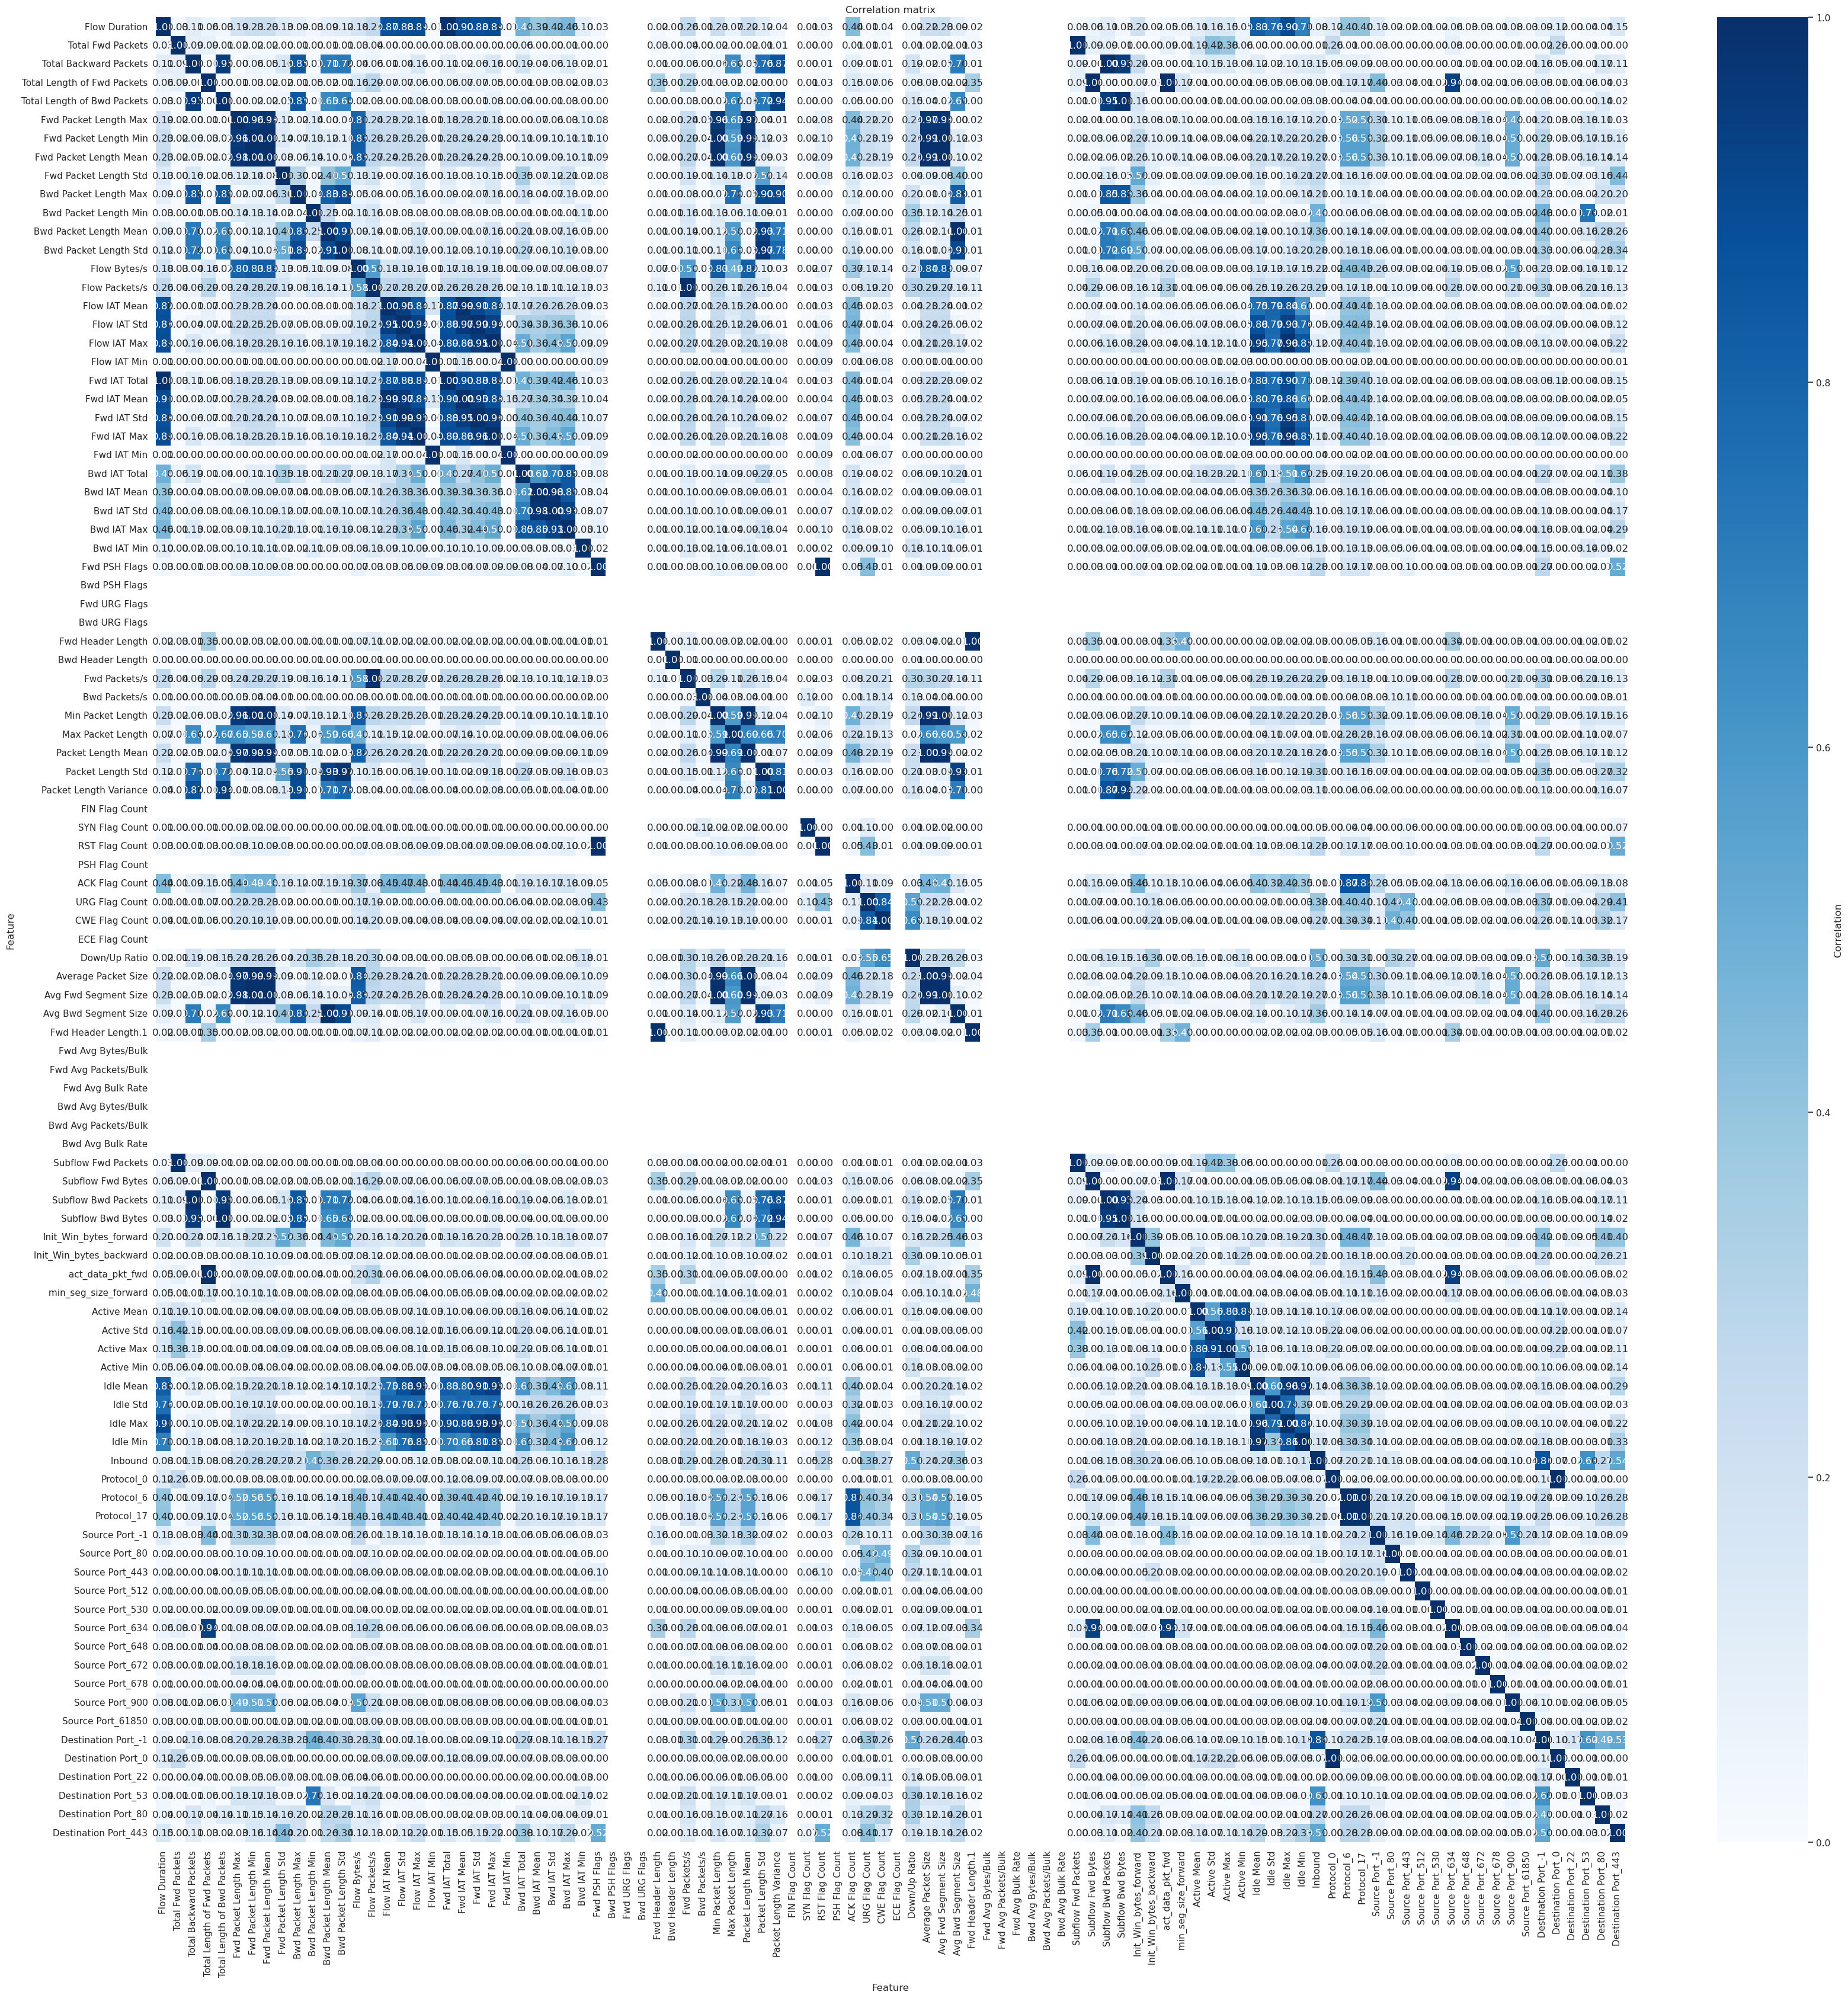

In [26]:
# Compute the correlation matrix
correlation_matrix = x_train_std.corr().abs()

# Compute the heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

In [27]:
#correlation analysis
c = correlation_matrix
so = c.unstack().reset_index()

aa = pd.DataFrame(so)
aa['sum'] = 0
# Get strongly correlatead features, removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
aa = aa[(aa[0].isnull()==False) & (aa["level_0"] != aa["level_1"])]

for col in correlation_matrix.columns:
    mask = aa['level_0'] == col
    aa['sum'].loc[mask]=(aa[0].loc[mask]**2).sum()


aa = aa.sort_values([0,'sum'], ascending = False)
print(aa)
# Extract features having a correlation > 0.8
aa = aa[aa[0]>0.8]


# Get the unique set of features to be saved and the set to be deleted
to_be_saved = []
to_be_deleted = []

savedCandidates = list(aa["level_0"])
toBeDeletedCandidates = list(aa['level_1'])

# Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = aa.copy()
for sav,tbd in zip(savedCandidates,toBeDeletedCandidates):
    if(sav not in to_be_deleted):
        if(sav in to_be_saved):
            to_be_deleted.append(tbd)
            subset_so = subset_so[(subset_so["level_0"] != tbd) & (subset_so["level_1"] != tbd)] # remove the rows that the removed feature is involved
        elif (tbd in to_be_saved): #if the candidate was saved before we cannot eliminate it in the future
            to_be_deleted.append(sav)
            subset_so = subset_so[(subset_so["level_0"] != sav) & (subset_so["level_1"] != sav)] # remove the rows that the removed feature is involved
        else:
            to_be_deleted.append(tbd)
            to_be_saved.append(sav) # add the feature to the removed candidates
            subset_so = subset_so[(subset_so["level_0"] != tbd) & (subset_so["level_1"] != tbd)] # remove the rows that the removed feature is involved


print(to_be_saved)
print(to_be_deleted)

                      level_0                  level_1         0       sum
738    Fwd Packet Length Mean     Avg Fwd Segment Size  1.000000  9.633782
5103     Avg Fwd Segment Size   Fwd Packet Length Mean  1.000000  9.633782
1131   Bwd Packet Length Mean     Avg Bwd Segment Size  1.000000  7.466905
5205     Avg Bwd Segment Size   Bwd Packet Length Mean  1.000000  7.466905
6176      Subflow Bwd Packets   Total Backward Packets  1.000000  7.329165
...                       ...                      ...       ...       ...
3341        Bwd Header Length    Bwd Packet Length Max  0.000061  0.001381
9248      Destination Port_22            Bwd Packets/s  0.000026  0.145328
3622            Bwd Packets/s      Destination Port_22  0.000026  0.128467
4066   Packet Length Variance           CWE Flag Count  0.000017  7.073443
4745           CWE Flag Count   Packet Length Variance  0.000017  2.565494

[7310 rows x 4 columns]
[' Fwd Packet Length Mean', ' Bwd Packet Length Mean', ' Subflow Bwd Packet

In [28]:
x_train_std = x_train_std.drop(columns = to_be_deleted)

## Ora rimuoviamo le righe null nella Correlation Matrix

rows_to_be_deleted = correlation_matrix[" Total Fwd Packets"].isnull()
to_be_dropped = rows_to_be_deleted.loc[rows_to_be_deleted == True].index
print(to_be_dropped)
x_train_std = x_train_std.drop(columns=to_be_dropped)
print(x_train_std.columns.size)

x_test_std = x_test_std.drop(columns = to_be_deleted)
x_test_std = x_test_std.drop(columns=to_be_dropped)

Index([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count',
       ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')
43


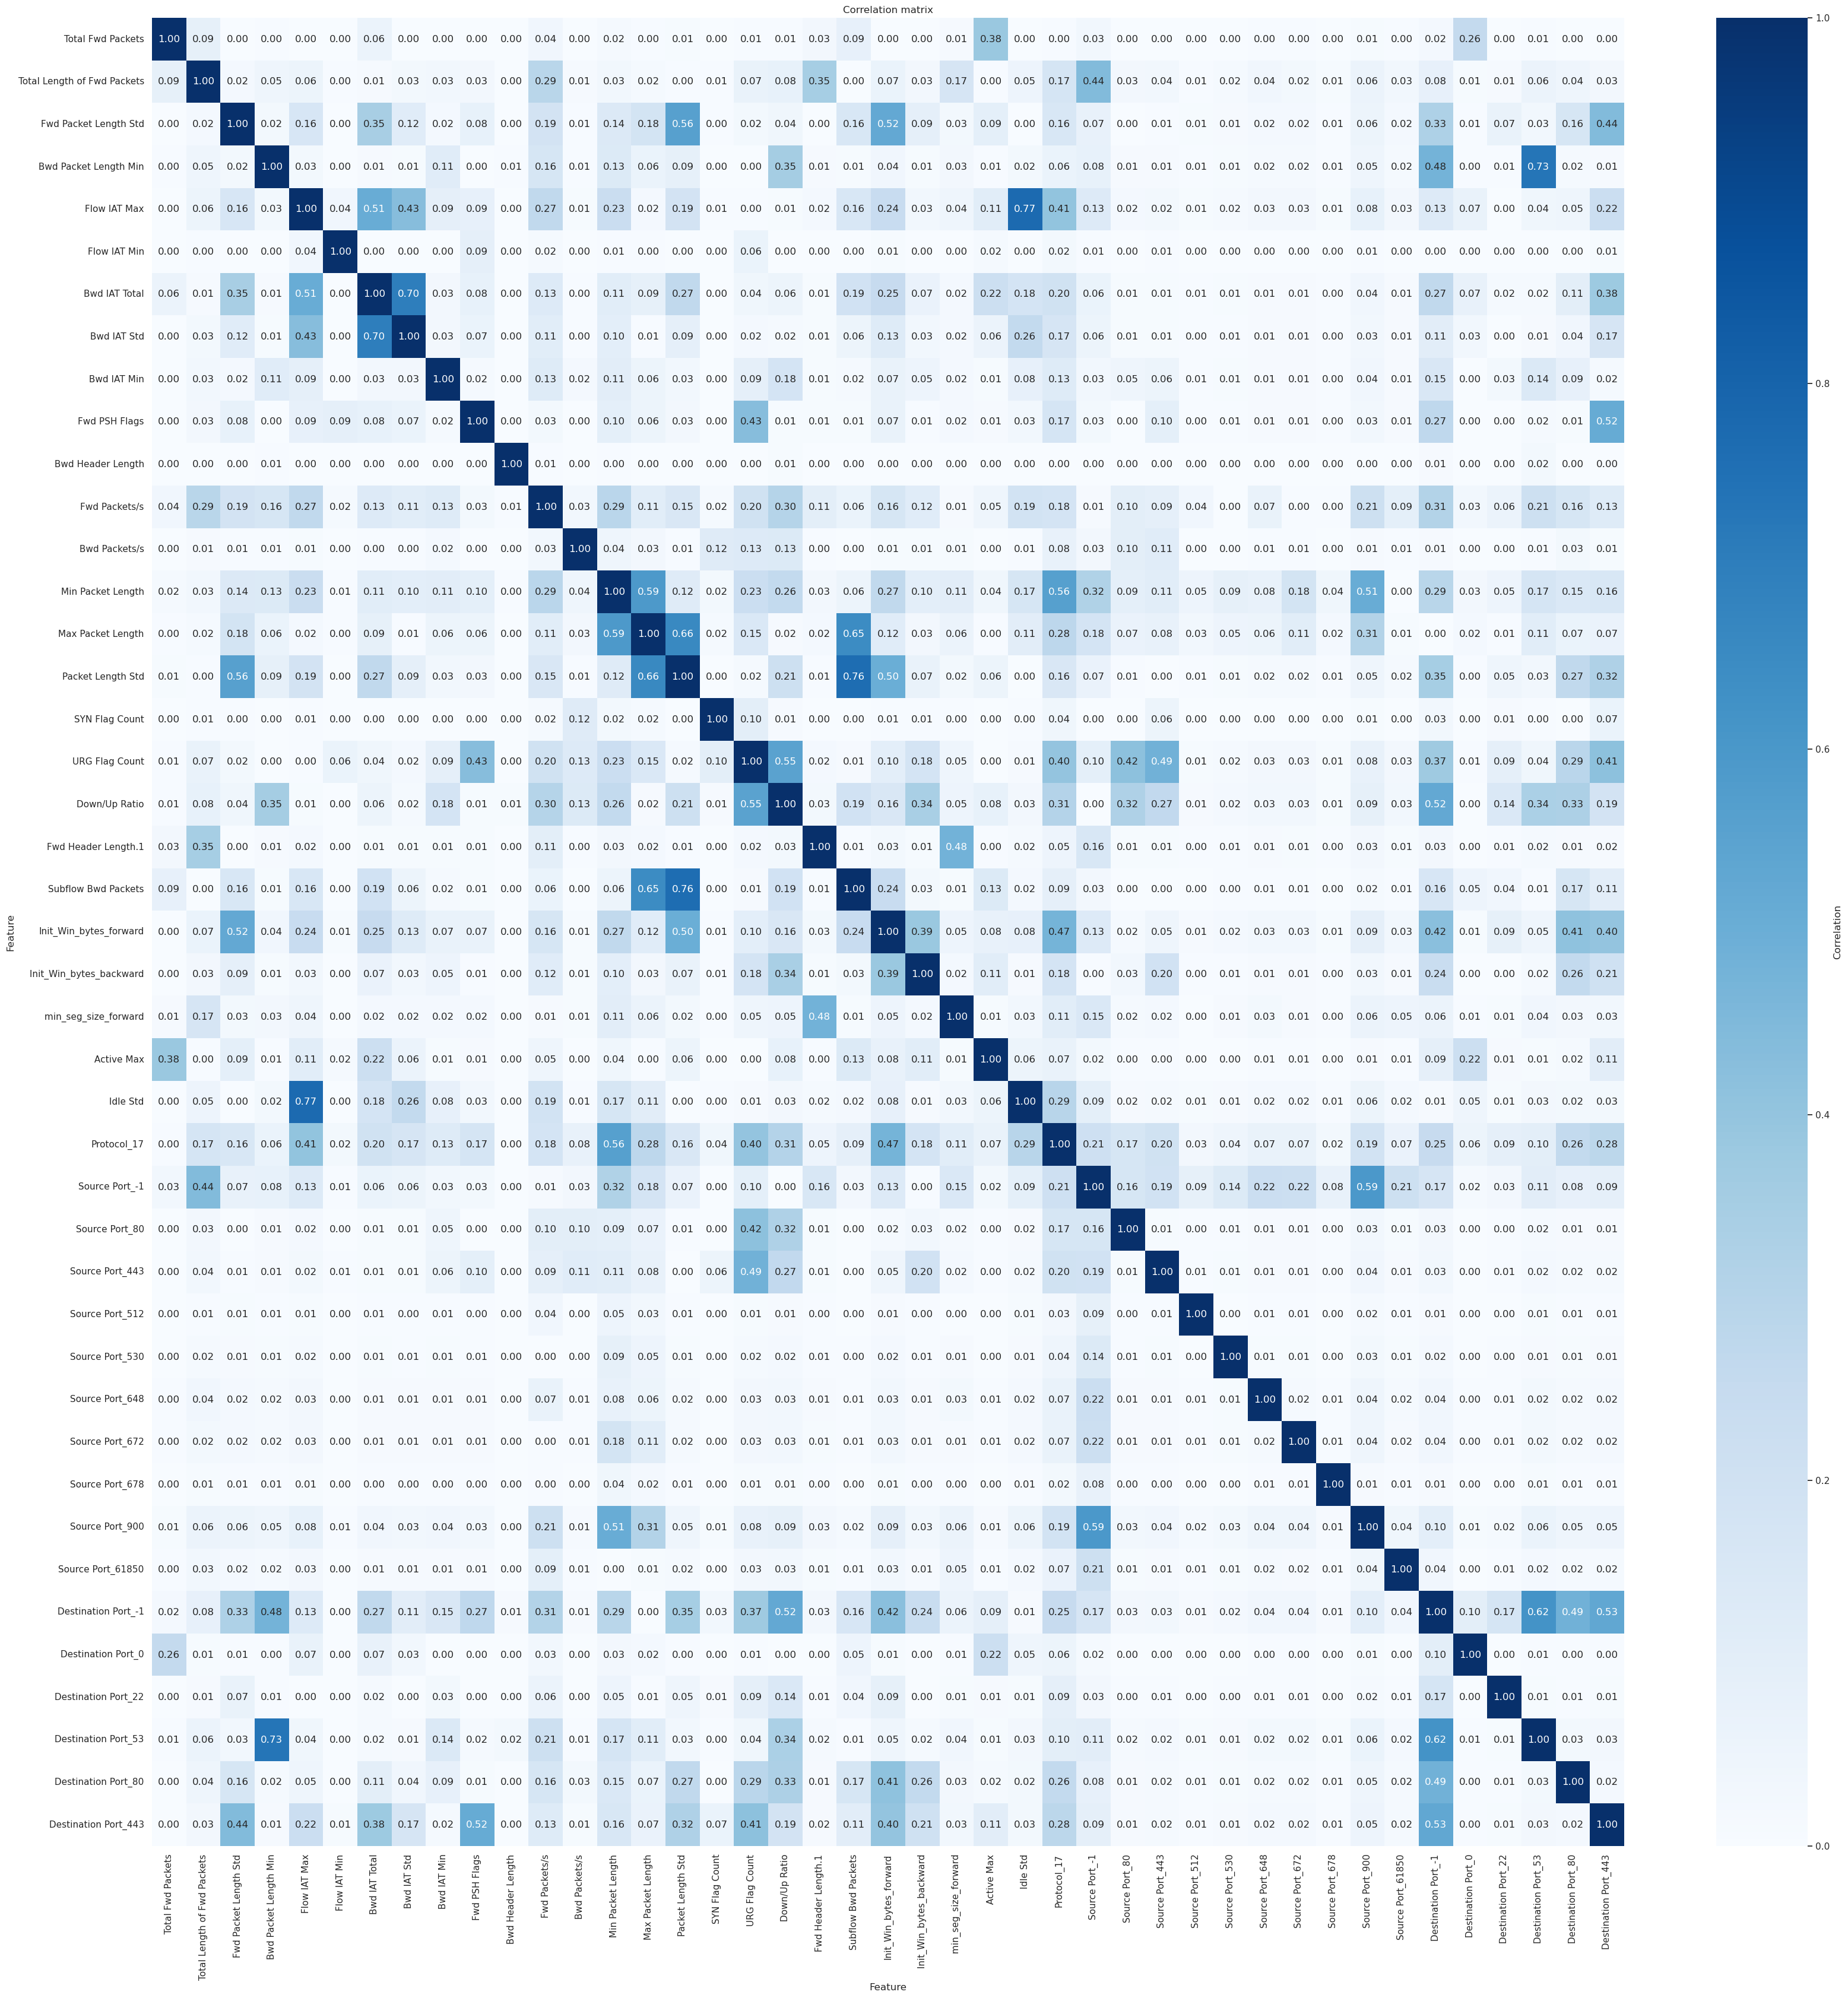

In [29]:
# Compute the correlation matrix
correlation_matrix = x_train_std.corr().abs()

# Compute the heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

### PCA

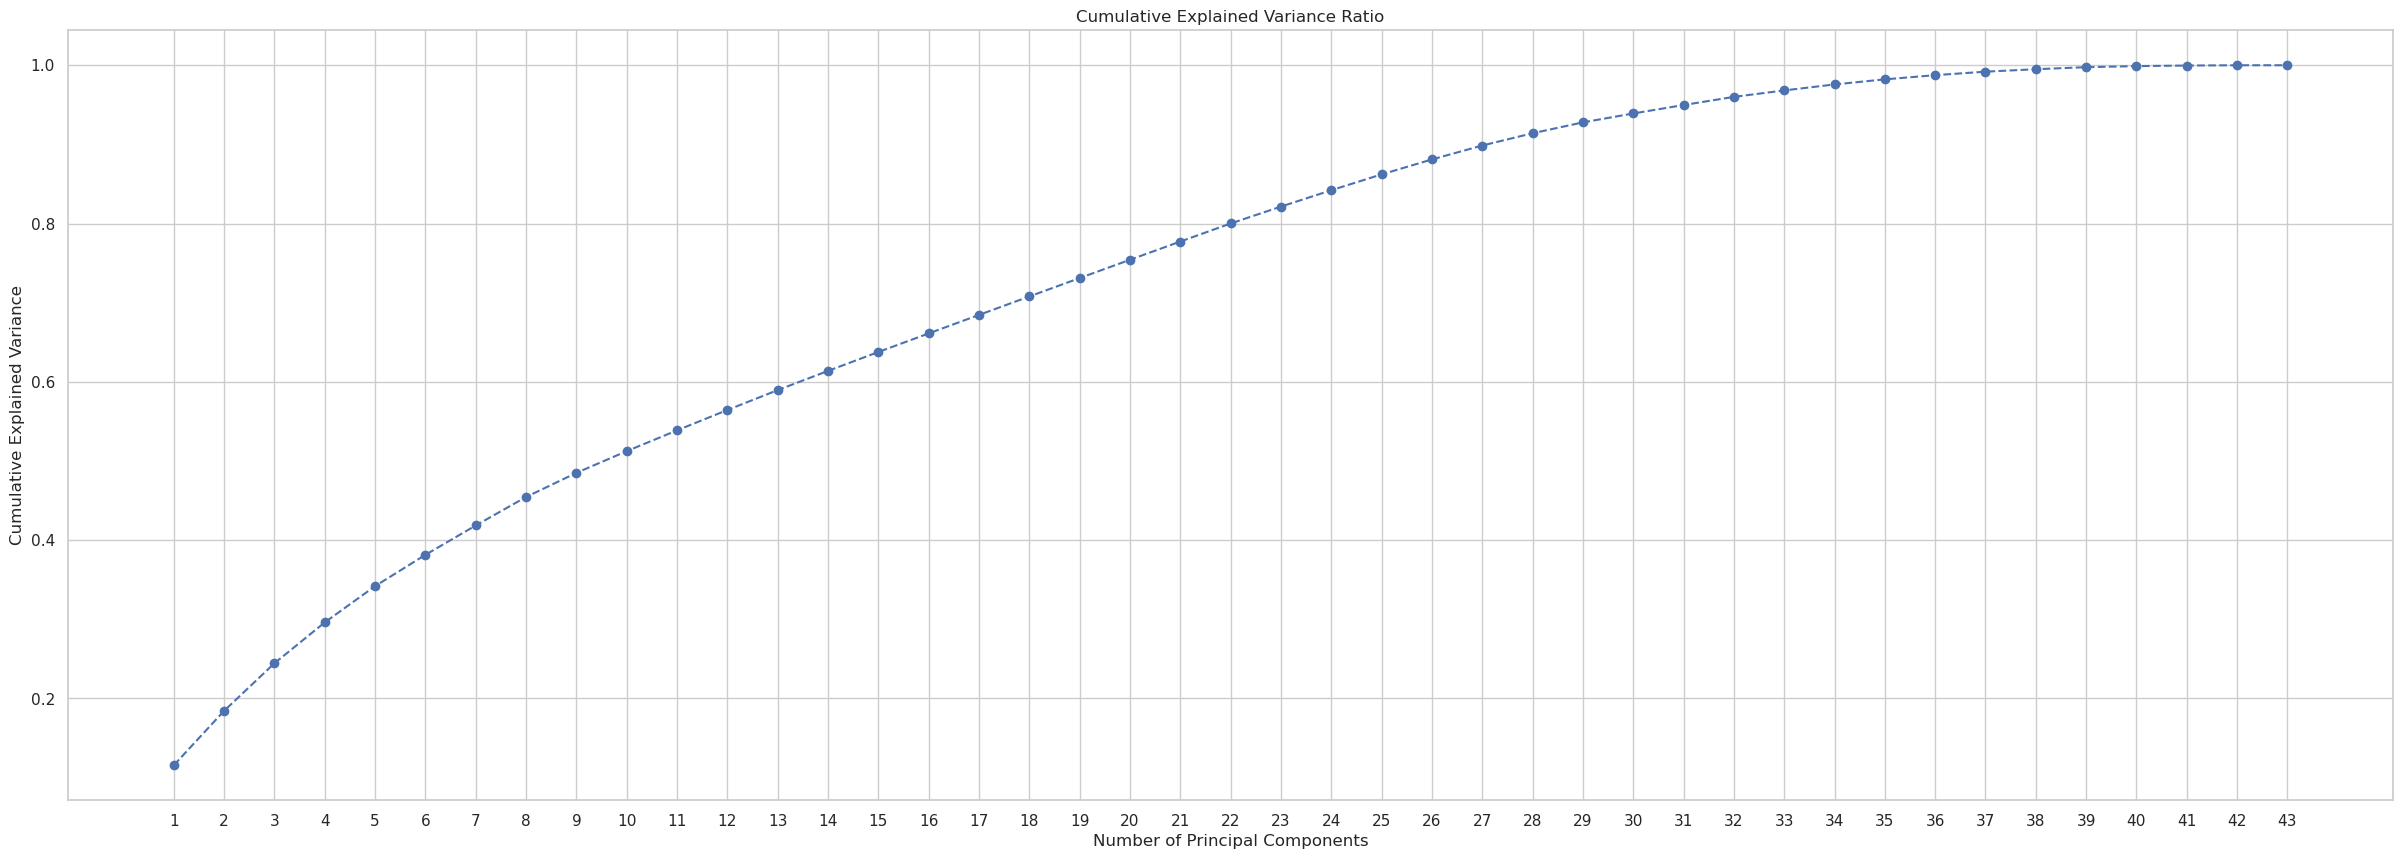

In [30]:
# PCA must be initialized with a random state to initialize the space
pca = PCA(random_state=15)

# .fit() is used to compute the new dimensions with number of features from 1 to the number of original features
pca.fit(x_train_std)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(30, 10))
plt.plot(range(0, len(explained_variance_ratio)), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks([i for i in range(x_train_std.columns.size)], [i for i in range(1,x_train_std.columns.size+1)])
plt.grid(True)
plt.show()

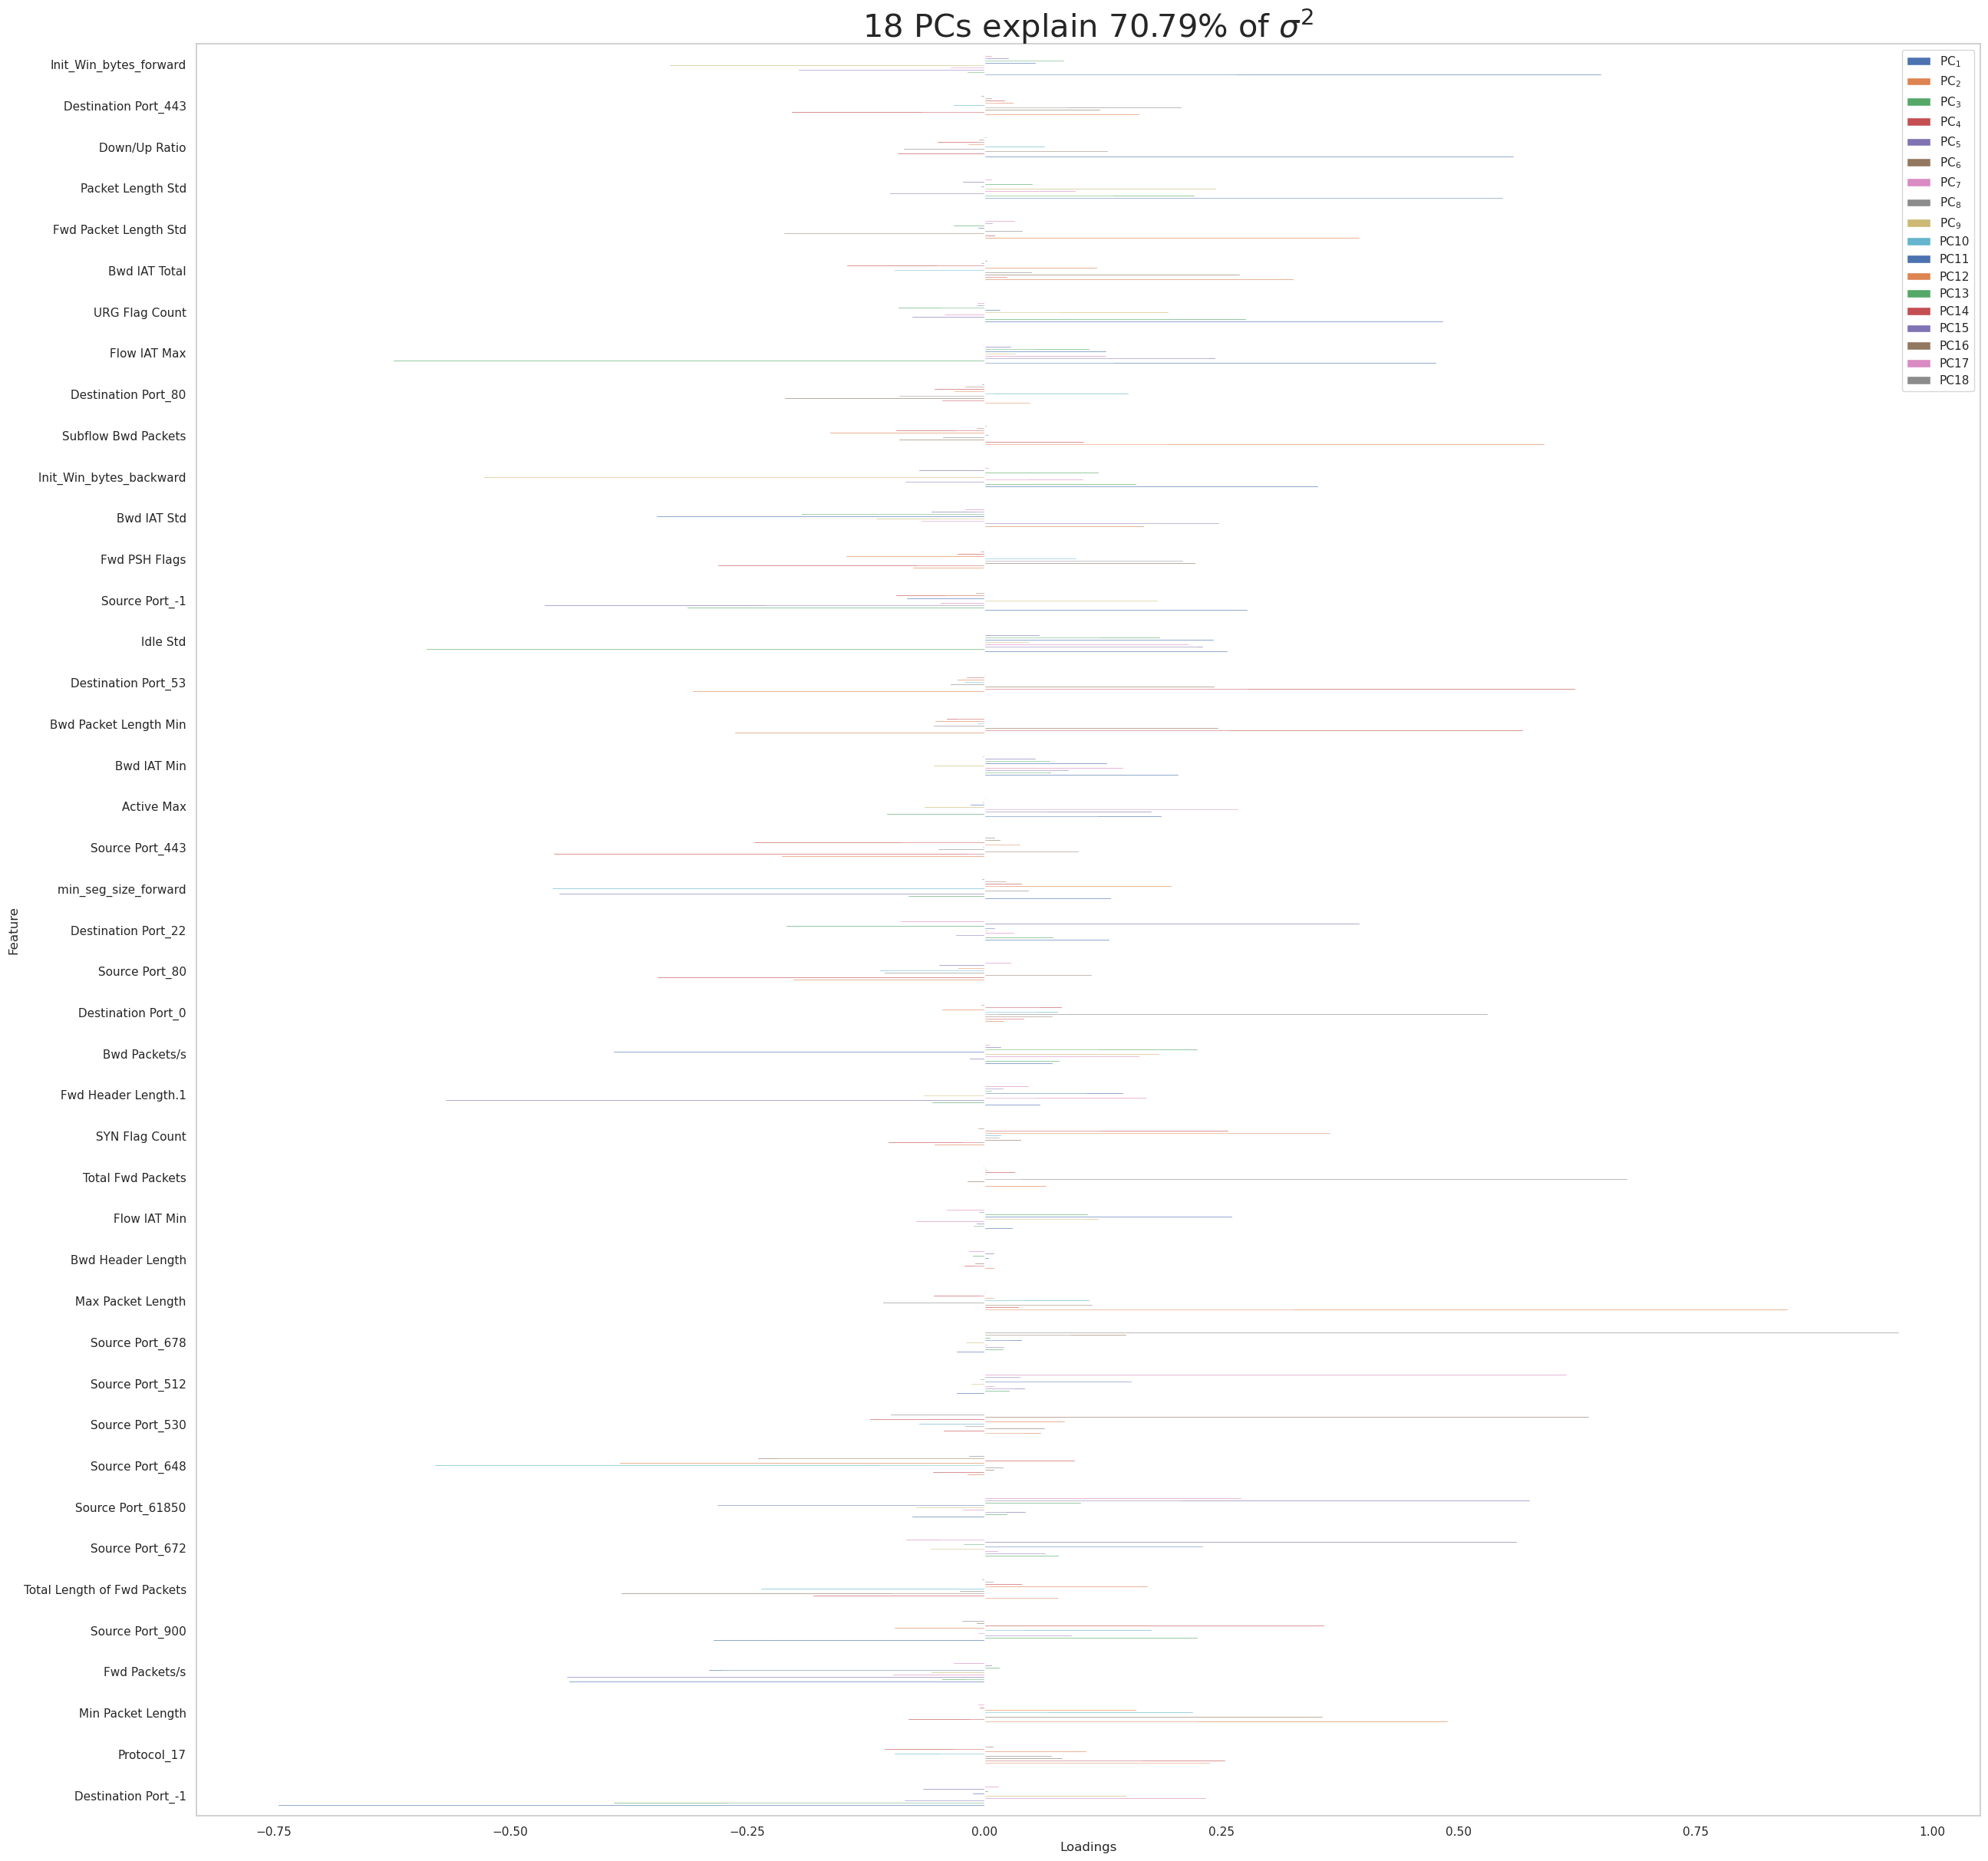

In [31]:
# Compute the loading scores and create the dataframe

list_tobuild = [f'PC{i}' for i in range(1,x_train_std.columns.size+1)]
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_),
    columns = list_tobuild,
    index = x_train_std.columns
)


plt.figure(figsize=(30, 30))
loadings = loadings[['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18']]
loadings.sort_values(['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$','PC3':'PC$_{3}$','PC4':'PC$_{4}$','PC5':'PC$_{5}$','PC6':'PC$_{6}$','PC7':'PC$_{7}$','PC8':'PC$_{8}$','PC9':'PC$_{9}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'18 PCs explain {round(cumulative_explained_variance[17]*100, 2)}% of $\sigma^2$',fontsize=30)
plt.show()

In [32]:
X_train = x_train_std
X_test = x_test_std
print(X_train)

        Total Fwd Packets  Total Length of Fwd Packets  \
39633           -0.034004                    -0.182864   
9396            -0.034004                    -0.182864   
19867           -0.034004                    -0.266831   
43869           -0.030129                    -0.258249   
11442           -0.034004                    -0.182864   
...                   ...                          ...   
39180           -0.034004                    -0.182864   
29430           -0.035941                    -0.326417   
6375            -0.034004                    -0.182864   
63253           -0.034004                    -0.287311   
18502           -0.034004                    -0.278826   

        Fwd Packet Length Std   Bwd Packet Length Min   Flow IAT Max  \
39633               -0.171018               -0.142931      -0.232174   
9396                -0.171018               -0.142931      -0.232173   
19867               -0.171018               -0.142931      -0.232174   
43869          